สมาชิก
1. นางสาวเครือวัลย์ เนตรพนา - 64199130036
2. นาย ชิน เลิศวิภาดา - 64199130039

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno 
import matplotlib.pyplot as plt     

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, RFE, mutual_info_classif
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# make the plot appear without explicitly show()
%matplotlib inline
plt.rcParams["figure.dpi"] = 100
plt.rcParams['savefig.bbox'] = 'tight'

In [2]:
# read data and store in DataFrame
url = 'https://raw.githubusercontent.com/jaochin/DS511-Data/main/bank-additional-full.csv'
df_bank = pd.read_csv(url,sep=';')

The original data source is from : https://archive.ics.uci.edu/ml/datasets/bank+marketing

# **Exploratory Data Analysis (EDA)**



In [3]:
# simple explore
print("Shape of data :", df_bank.shape,'\n')
print("Type of data :\n", df_bank.dtypes,'\n')
df_bank.head()

Shape of data : (41188, 21) 

Type of data :
 age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object 



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


The feature 'y' is a target.<br>
- 'yes' : client applied the product offered by bank
- 'no'  : client didn't apply the product offered by bank 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64 



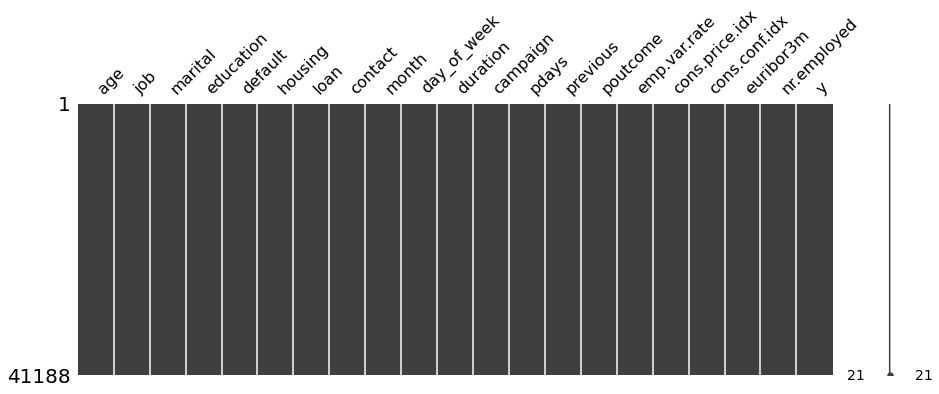

In [4]:
# check missing value
print(df_bank.isnull().sum(),'\n')
msno.matrix(df_bank, figsize=(15, 5))

Good news!<br>
We don't have any missing data.

In [5]:
# describe numerical data
df_bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
# describe categorical data
df_bank.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


Most of the output data fall into class 'no'!<br>
We have the imbalance data.

In [7]:
# this feature 'duration' quite influence to the output class. So, let's explore this data
dur_tg_mean = df_bank['duration'].groupby(df_bank['y']).mean()
dur_tg_max = df_bank['duration'].groupby(df_bank['y']).max()
dur_tg_min = df_bank['duration'].groupby(df_bank['y']).min()

print('Mean duration of last contact: "say No!" = {:.2f} / "say Yes" = {:.2f} seconds'.format(dur_tg_mean['no'],dur_tg_mean['yes']))
print('Max duration of last contact : "say No!" = {:.2f} / "say Yes" = {:.2f} seconds'.format(dur_tg_max['no'],dur_tg_max['yes']))
print('Min duration of last contact : "say No!" = {:.2f} / "say Yes" = {:.2f} seconds'.format(dur_tg_min['no'],dur_tg_min['yes']))

Mean duration of last contact: "say No!" = 220.84 / "say Yes" = 553.19 seconds
Max duration of last contact : "say No!" = 4918.00 / "say Yes" = 4199.00 seconds
Min duration of last contact : "say No!" = 0.00 / "say Yes" = 37.00 seconds


***Insight!***<br>
This columns 'duration' is the duration of last call with the customer to confirm the result.<br>
Mean of duration time for people who say 'Yes' are significantly greater than people who say 'No'.

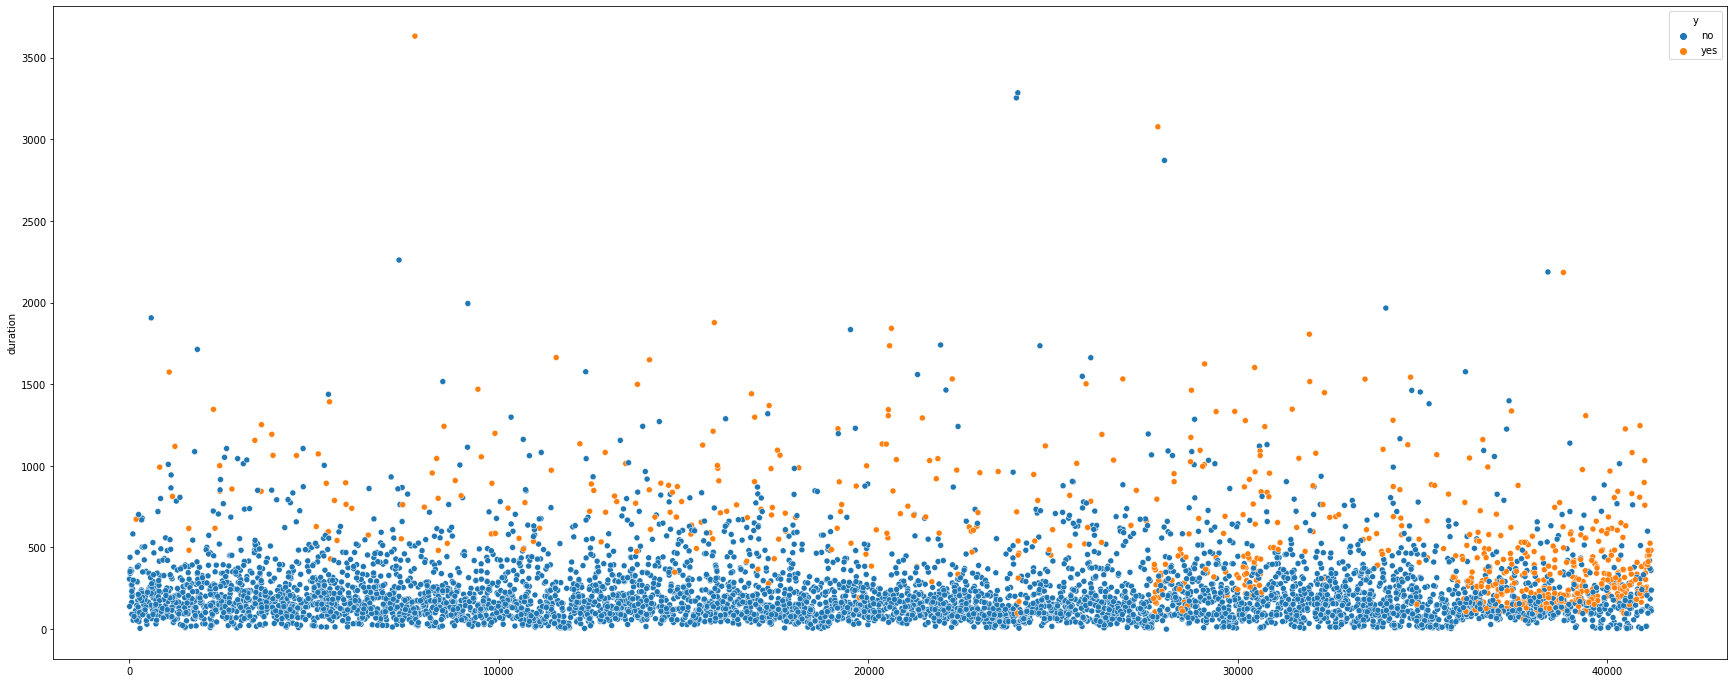

In [8]:
# let simply split the data and plot for having the vision of feature 'duration'
X_train, X_test, y_train, y_test = train_test_split(df_bank, df_bank.iloc[:,-1:], stratify=df_bank.iloc[:,-1:], test_size=0.85, random_state = 0)

fig, axs = plt.subplots(figsize=(30,12))
sns.scatterplot(ax=axs, data=X_train, x=X_train.index, y='duration', hue='y')

This plot supports above hypothesis.<br>

In [9]:
# drop feature 'duration' because it can make the model too fit with the data
df_bank.drop('duration', axis=1, inplace=True)

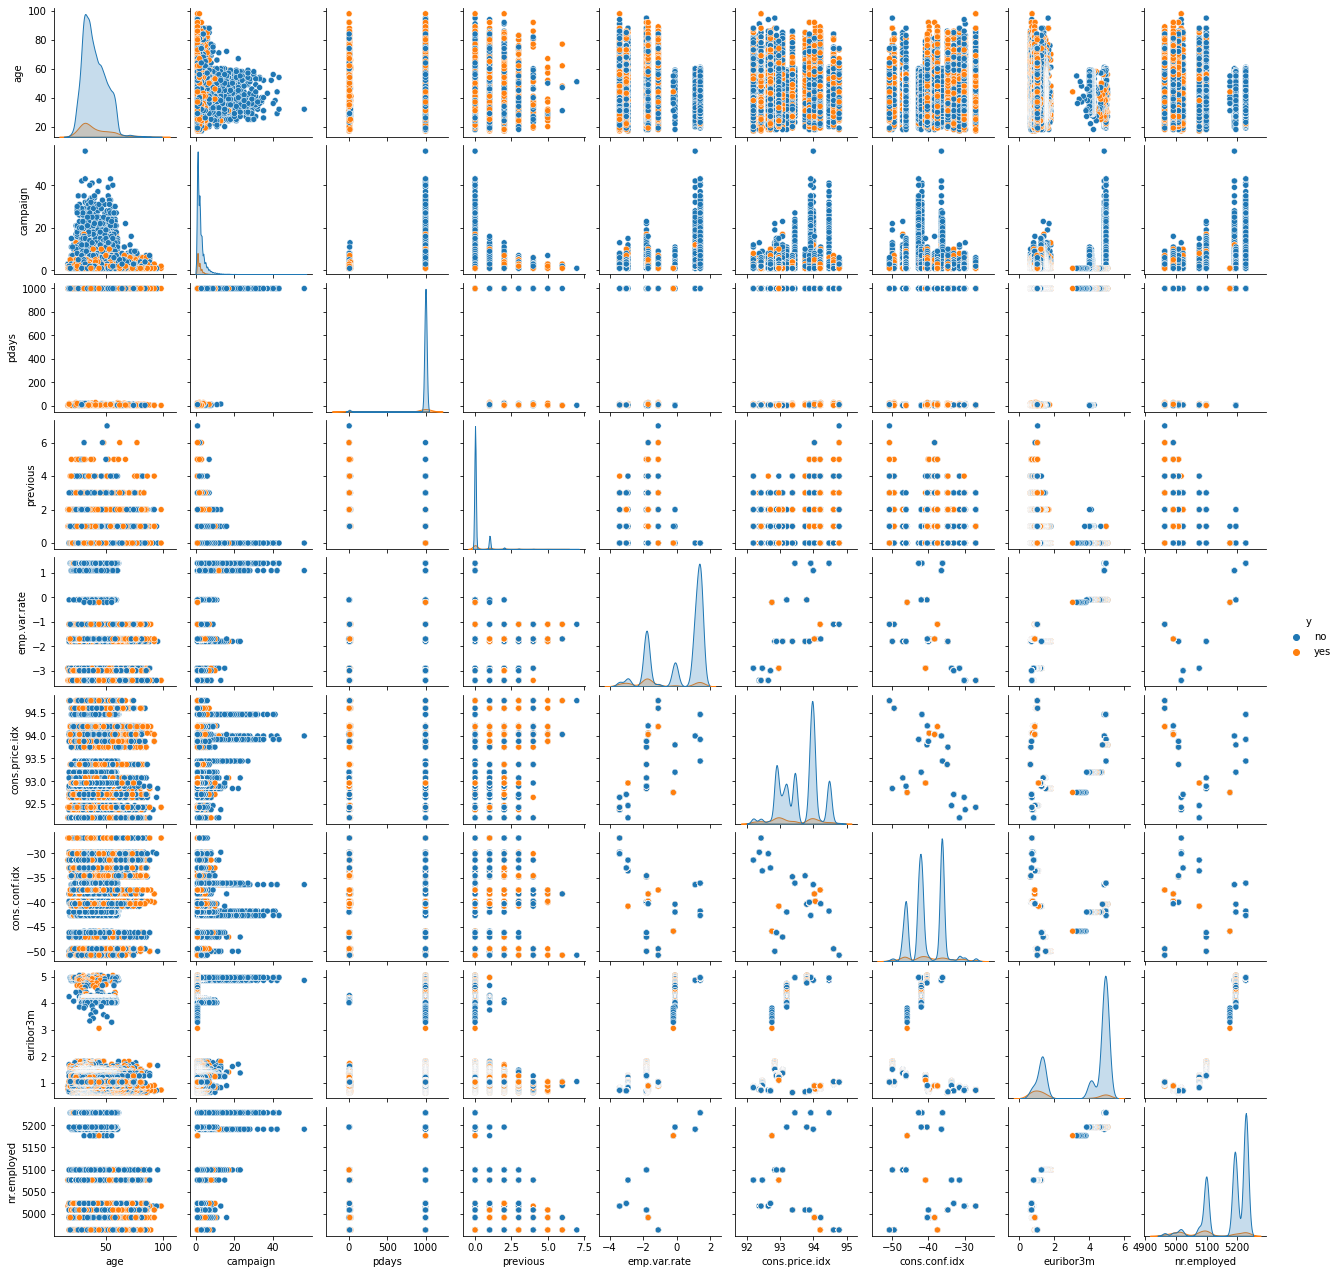

In [10]:
# inspect the relationship between each features
sns.pairplot(df_bank, height = 2 ,kind ='scatter',diag_kind='kde',hue='y')
plt.show()
plt.close()

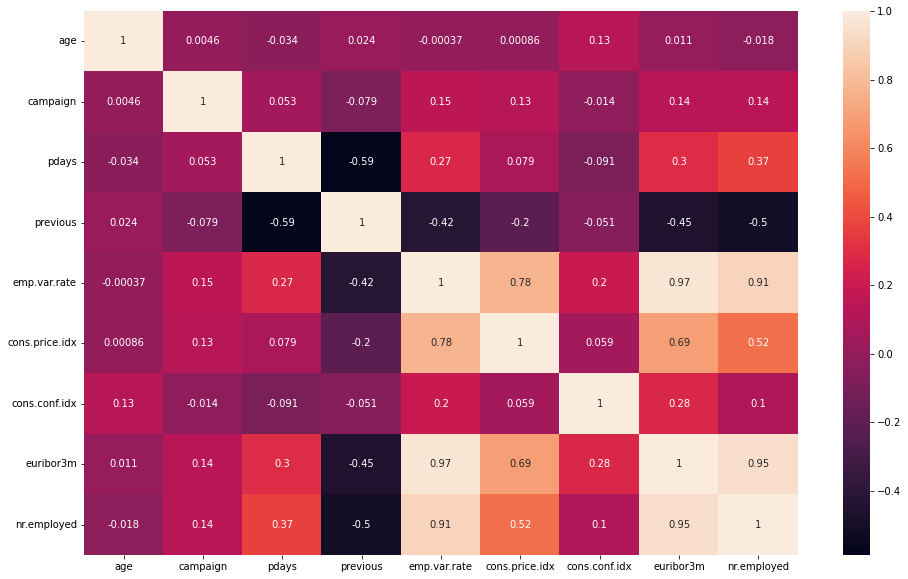

In [11]:
# inspect corrilation for those numerical features
df_bank_corr = df_bank.corr()

# plot the cross relationship between each pair
plt.figure(figsize=(16, 10))
sns.heatmap(data=df_bank_corr, annot=True)

Some pair of feature have very high correlation. We'll remove them. 

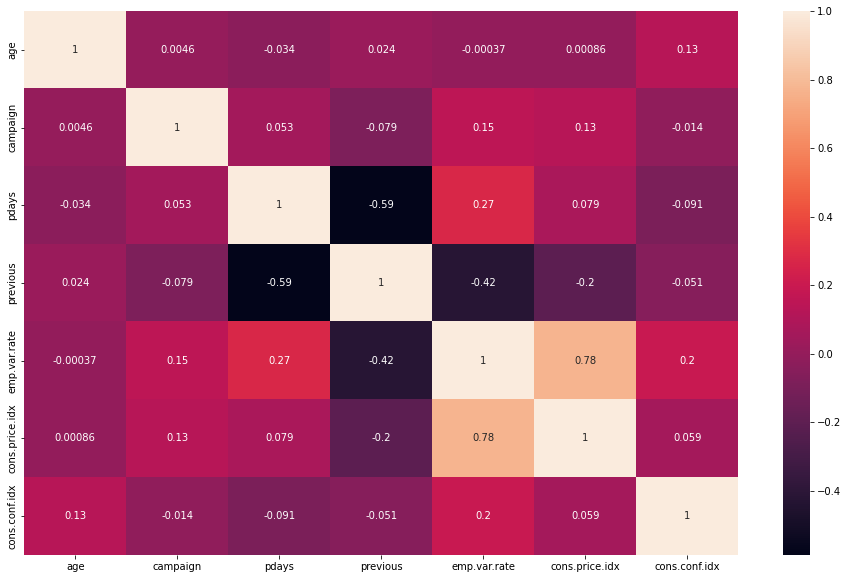

In [12]:
# finding high correlation > 0.9
col_high_corr=[]
for i in range(0,len(df_bank_corr.columns)):
  for j in range(i+1,len(df_bank_corr.columns)):
    if (df_bank_corr.iloc[i,j] > 0.9) and (df_bank_corr.columns[j] not in col_high_corr):
      col_high_corr.append(df_bank_corr.columns[j])

# drop those features which has high correlation
df_bank.drop(col_high_corr, axis=1, inplace=True)

# plot the heatmap again to see the result
plt.figure(figsize=(16, 10))
sns.heatmap(data=df_bank.corr(), annot=True)

In [13]:
# explore possible values and their frequency of categorical features
print(df_bank['job'].value_counts(),'\n')
print(df_bank['marital'].value_counts(),'\n')
print(df_bank['education'].value_counts(),'\n')
print(df_bank['default'].value_counts(),'\n')
print(df_bank['housing'].value_counts(),'\n')
print(df_bank['loan'].value_counts(),'\n')
print(df_bank['contact'].value_counts(),'\n')
print(df_bank['month'].value_counts(),'\n')
print(df_bank['day_of_week'].value_counts(),'\n')
print(df_bank['poutcome'].value_counts(),'\n')
print(df_bank['y'].value_counts(),'\n')

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64 

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64 

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64 

no         32588
unknown     8597
yes            3
Name: default, dtype: int64 

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64 

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64 

cellular     26144
telephone    15044
Name: contact, dtype: int64 

may    13769
jul     717

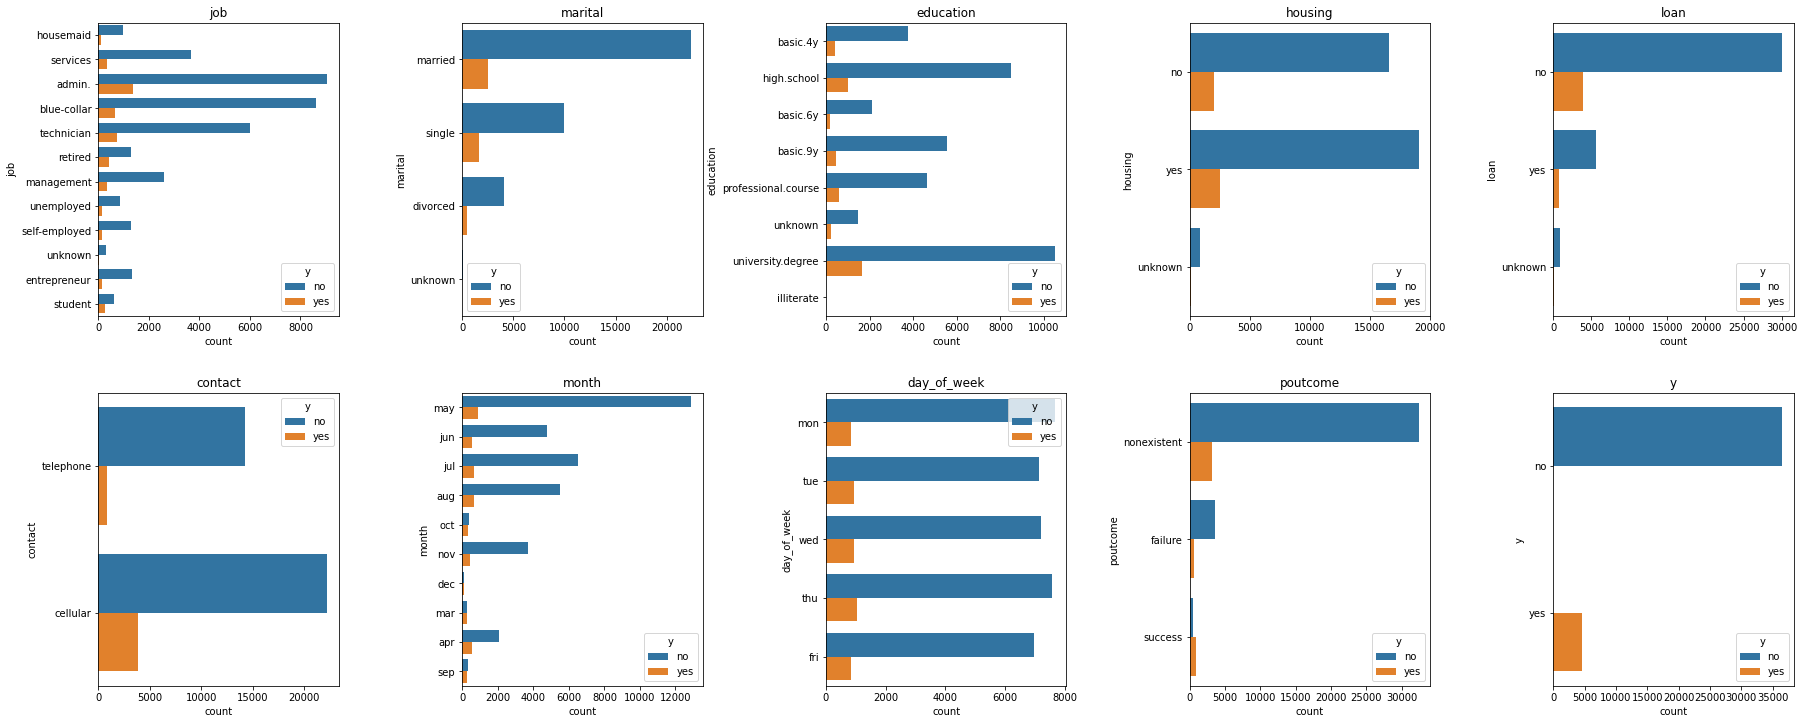

In [14]:
features_obj = ['job','marital','education','housing','loan','contact','month','day_of_week','poutcome','y']

# plot counting chart of all categorical features
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(25, 10))
index = 0
axs = axs.flatten()

for k in features_obj:
  sns.countplot(data=df_bank, y=k, ax=axs[index], hue='y')
  axs[index].set_title(k)
  index += 1

plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=3)

***Insight!***<br>
- People with job = 'student' seems to have the best ratio for applying the product.<br>
- In month = 'sep' seems to have the best ratio for applying the product. On the other hand month = 'may' gives the worst result.
- More than half of people whose applied last product offered by bank (poutcome = 'success'), apply for this product offering. 

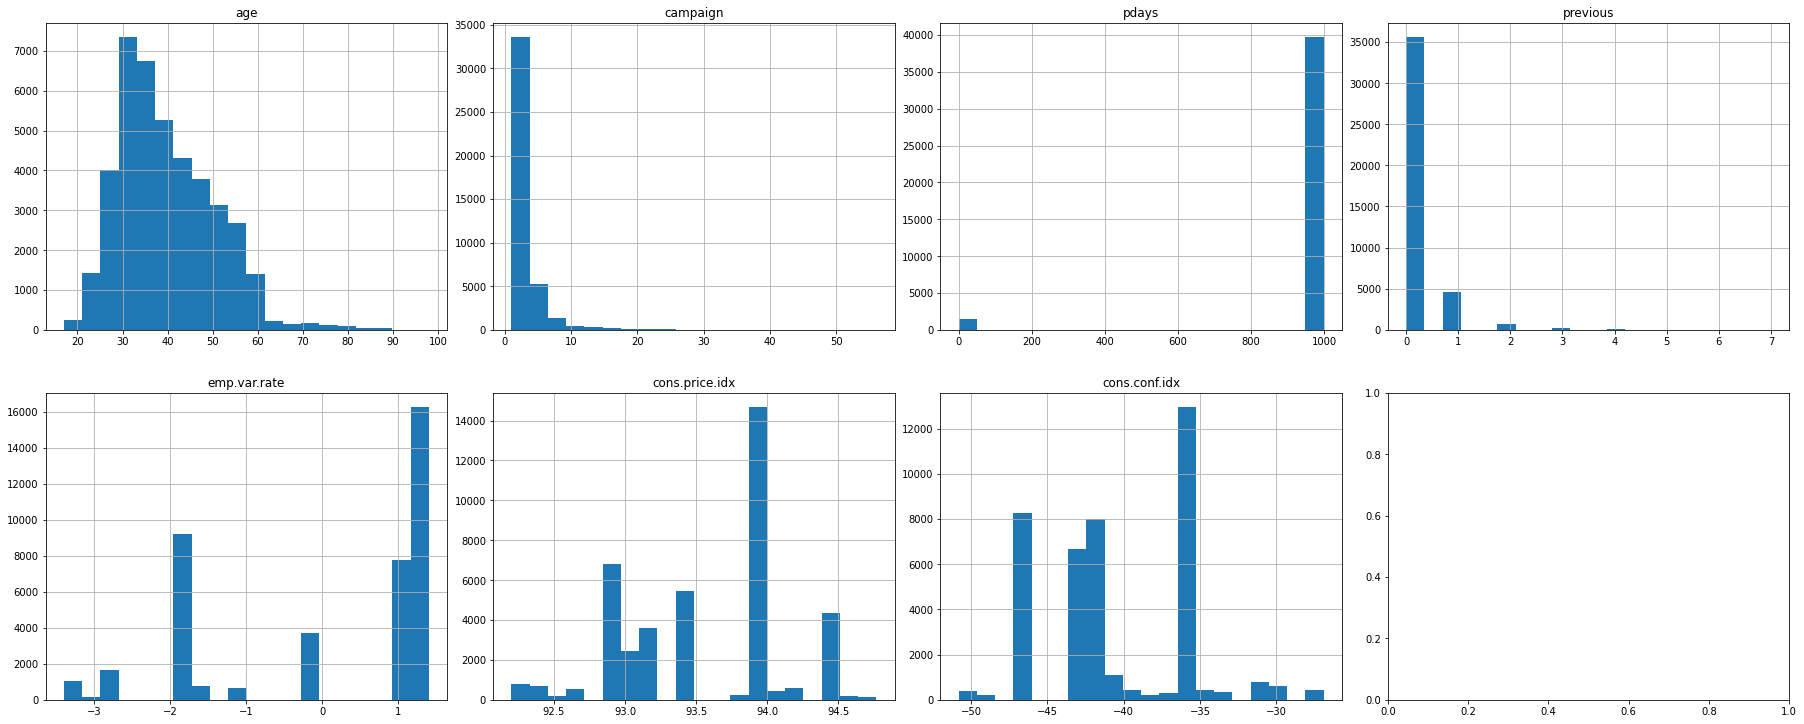

In [15]:
features_num = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx']

# plot distribution of all numerical features
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(25, 10))
index = 0
axs = axs.flatten()

for k in features_num:
    df_bank[k].hist(bins=20, ax=axs[index])
    axs[index].set_title(k)
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=3)

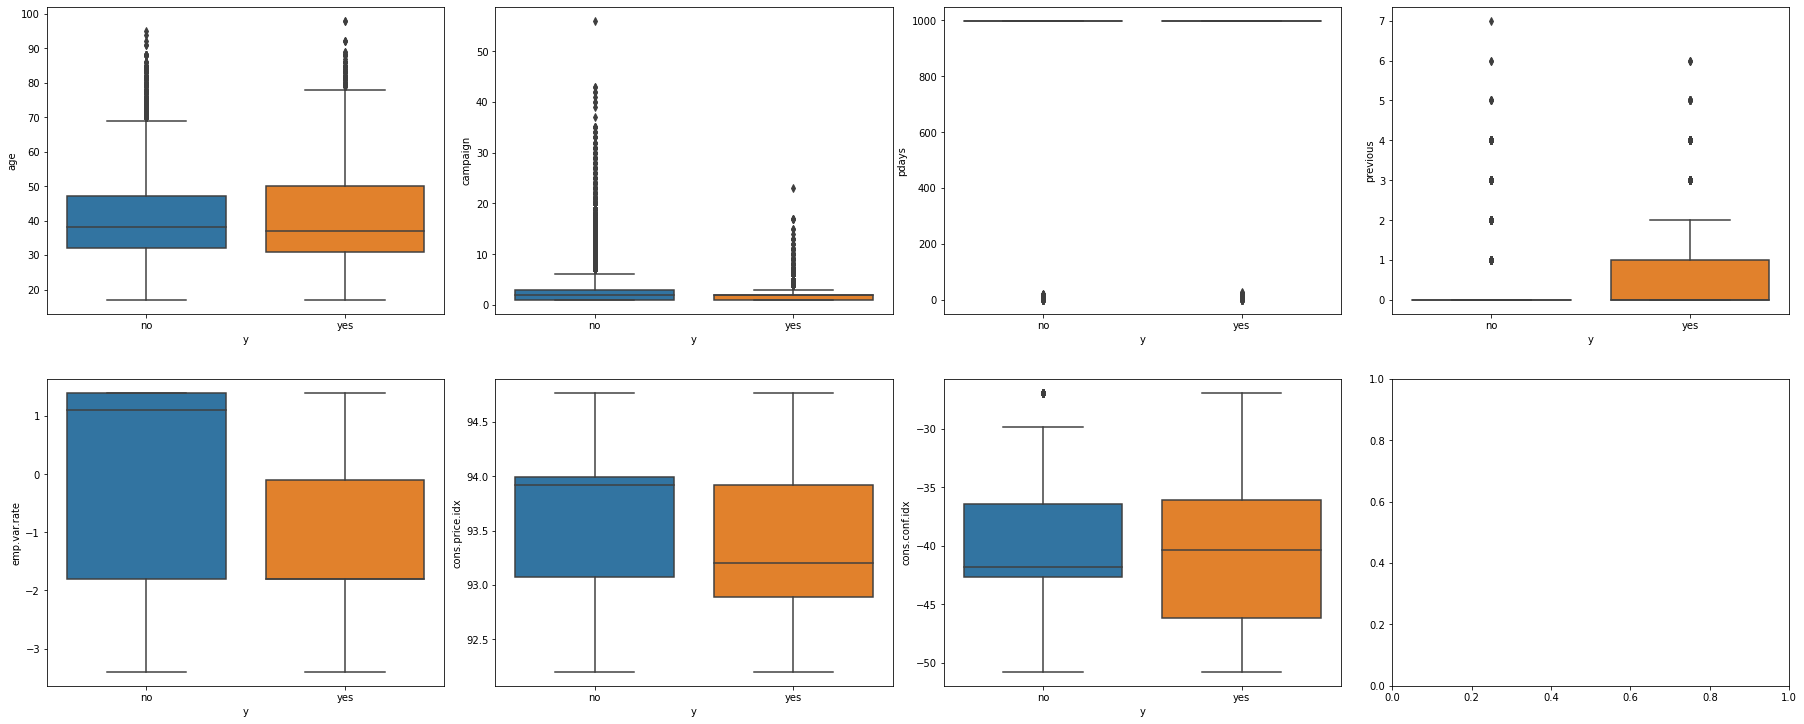

In [16]:
# plot boxplot of all numerical features
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(25, 10))
index = 0
axs = axs.flatten()

for k in features_num:
  sns.boxplot(data=df_bank, y=k, x='y', ax=axs[index])
  index += 1

plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=3)

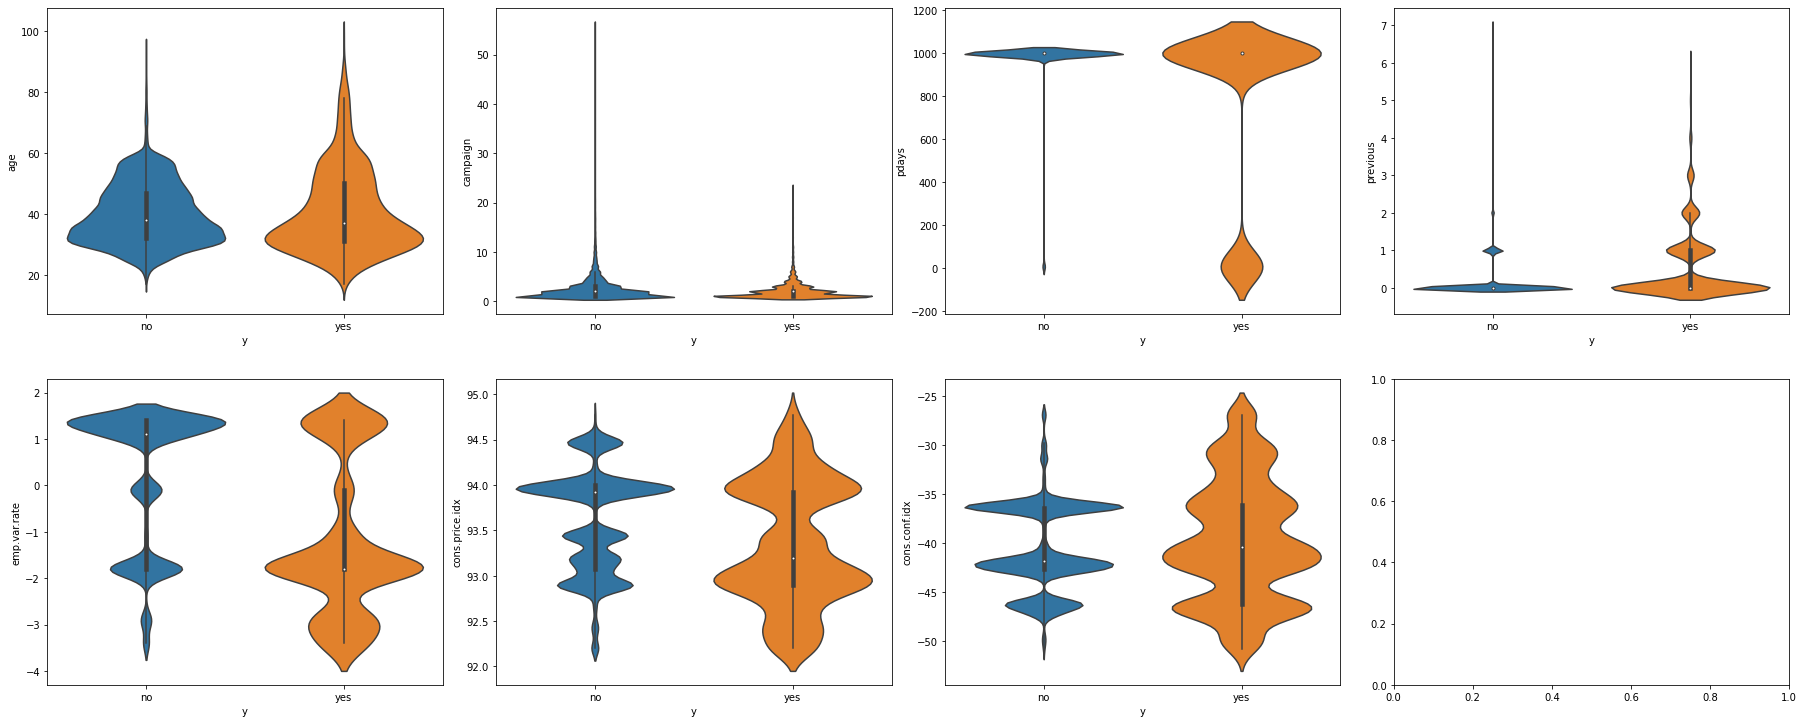

In [17]:
# plot violin of all numerical features
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(25, 10))
index = 0
axs = axs.flatten()

for k in features_num:
  sns.violinplot(x='y', y=k, data=df_bank, ax=axs[index], scale="width")
  index += 1

plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=3)

The distribution are abnormal, we'll need the standardize.

In [18]:
# it seems we can impute the feature 'job' by feature 'age'. let's find mean 'age' for each 'job'
print('admin. age:',df_bank['age'][df_bank['job'] == 'admin.'].mean())
print('blue-collar age:',df_bank['age'][df_bank['job'] == 'blue-collar'].mean())
print('technician age:',df_bank['age'][df_bank['job'] == 'technician'].mean())
print('services age:',df_bank['age'][df_bank['job'] == 'services'].mean())
print('management age:',df_bank['age'][df_bank['job'] == 'management'].mean())
print('retired age:',df_bank['age'][df_bank['job'] == 'retired'].mean())
print('entrepreneur age:',df_bank['age'][df_bank['job'] == 'entrepreneur'].mean())
print('self-employed age:',df_bank['age'][df_bank['job'] == 'self-employed'].mean())
print('housemaid age:',df_bank['age'][df_bank['job'] == 'housemaid'].mean())
print('unemployed age:',df_bank['age'][df_bank['job'] == 'unemployed'].mean())
print('student age:',df_bank['age'][df_bank['job'] == 'student'].mean())

admin. age: 38.18729610439455
blue-collar age: 39.555759671493405
technician age: 38.5076375500519
services age: 37.92642983119173
management age: 42.36285909712722
retired age: 62.027325581395345
entrepreneur age: 41.723214285714285
self-employed age: 39.94933145672062
housemaid age: 45.5
unemployed age: 39.73372781065089
student age: 25.89485714285714


Seems we can impute for 'student' and 'retired' who are min and max of the range.

In [19]:
# impute job 'student' and 'retired' by age
mask_student = (df_bank['age'] <= (df_bank['age'][df_bank['job'] == 'student'].mean())) & (df_bank['job'] == 'unknown')
mask_retired = (df_bank['age'] >= (df_bank['age'][df_bank['job'] == 'retired'].mean())) & (df_bank['job'] == 'unknown')

df_bank.loc[mask_student,'job'] = 'student'
df_bank.loc[mask_retired,'job'] = 'retired'

In [20]:
# find the max of feature 'pdays' which isn't 999
print(sorted(df_bank['pdays'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 999]


Feature 'pdays' is telling the duration (days) from the last contact to client.<br>
The value '999' means this client never been contacted.<br>
The max normal value is '27'. So, we decided to make this feature to be categorical instead.

In [21]:
# transform duration (day) after last contact to client from numeric to category
df_bank['pdays'] = ['no' if pdays == 999 else 'yes' for pdays in df_bank['pdays']]

In [22]:
# again, simply explore after EDA
print('Shape of dataframe:', df_bank.shape, '\n')
print(df_bank.dtypes,'\n')
df_bank.head()

Shape of dataframe: (41188, 18) 

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays              object
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
y                  object
dtype: object 



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,no,0,nonexistent,1.1,93.994,-36.4,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,no,0,nonexistent,1.1,93.994,-36.4,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,no,0,nonexistent,1.1,93.994,-36.4,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,no,0,nonexistent,1.1,93.994,-36.4,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,no,0,nonexistent,1.1,93.994,-36.4,no


# **Split & Transform the data**

In [23]:
# select Features
X = df_bank.drop('y', axis=1)
# select Target
y = df_bank['y']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state = 0)

In [24]:
## create pipeline

# list for ordinalEncoder of feature 'education'
edu_list = ['unknown', 'illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']

# declare pipeline for data pre-procession
pipe_cate = Pipeline([('imputer',SimpleImputer(strategy='most_frequent')), ('onehot',OneHotEncoder(handle_unknown='ignore', sparse=False))])
pipe_num = Pipeline([('imputer',SimpleImputer(strategy='mean')), ('std',StandardScaler())])
pipe_ord = Pipeline([('imputer',SimpleImputer(strategy='most_frequent')), ('ord',OrdinalEncoder(categories=[edu_list]))])

# declare columnTransformer to include these above pipelines
preproc_X = ColumnTransformer([
     ('cate', pipe_cate, ['job','marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'pdays']),
     ('norm', pipe_num, ['age', 'campaign', 'previous','emp.var.rate','cons.price.idx','cons.conf.idx']),
     ('ord', pipe_ord, ['education'])
     ], remainder='passthrough')

In [25]:
## transform target value to the numerical value using labelEncoder

lb_enc = LabelEncoder()

# transform y_train
y_train_tran = lb_enc.fit_transform(y_train)
# transform y_test
y_test_tran = lb_enc.transform(y_test)

# **Feature selection**

Prepare the column for feature selection<br>
 - after one-hot encoding for categorical feature, it can be expanded to many features, so prepare the list of possible expanded columns

In [26]:
## Initialize for Feature selection

# count value for each feature after ColumnTransformer
print('count job         :', len(df_bank['job'].unique()))
print('count marital     :', len(df_bank['marital'].unique()))
print('count default     :', len(df_bank['default'].unique()))
print('count housing     :', len(df_bank['housing'].unique()))
print('count loan        :', len(df_bank['loan'].unique()))
print('count contact     :', len(df_bank['contact'].unique()))
print('count month       :', len(df_bank['month'].unique()))
print('count day_of_week :', len(df_bank['day_of_week'].unique()))
print('count poutcome    :', len(df_bank['poutcome'].unique()))
print('count pdays       :', len(df_bank['pdays'].unique()))

# generate the column header after ColumnTransformer
preproc_X_col = ['job'] * len(df_bank['job'].unique()) + ['marital'] * len(df_bank['marital'].unique()) + \
                ['default'] * len(df_bank['default'].unique()) + ['housing'] * len(df_bank['housing'].unique()) + \
                ['loan'] * len(df_bank['loan'].unique()) + ['contact'] * len(df_bank['contact'].unique()) + \
                ['month'] * len(df_bank['month'].unique()) + ['day_of_week'] * len(df_bank['day_of_week'].unique()) + \
                ['poutcome'] * len(df_bank['poutcome'].unique()) + ['pdays'] * len(df_bank['pdays'].unique()) + \
                ['age','campaign','previous','emp.var.rate','cons.price.idx','cons.conf.idx','education']
print('\n', preproc_X_col)

# transform X_train for performing feature selection
pipe = Pipeline([('prepro',preproc_X)])
X_train_enc_scale = pipe.fit_transform(X_train)

count job         : 12
count marital     : 4
count default     : 3
count housing     : 3
count loan        : 3
count contact     : 2
count month       : 10
count day_of_week : 5
count poutcome    : 3
count pdays       : 2

 ['job', 'job', 'job', 'job', 'job', 'job', 'job', 'job', 'job', 'job', 'job', 'job', 'marital', 'marital', 'marital', 'marital', 'default', 'default', 'default', 'housing', 'housing', 'housing', 'loan', 'loan', 'loan', 'contact', 'contact', 'month', 'month', 'month', 'month', 'month', 'month', 'month', 'month', 'month', 'month', 'day_of_week', 'day_of_week', 'day_of_week', 'day_of_week', 'day_of_week', 'poutcome', 'poutcome', 'poutcome', 'pdays', 'pdays', 'age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'education']


Plot F-value & P-value
 - F-value : high value show high importance 
 - P-value : vice versa with F-value

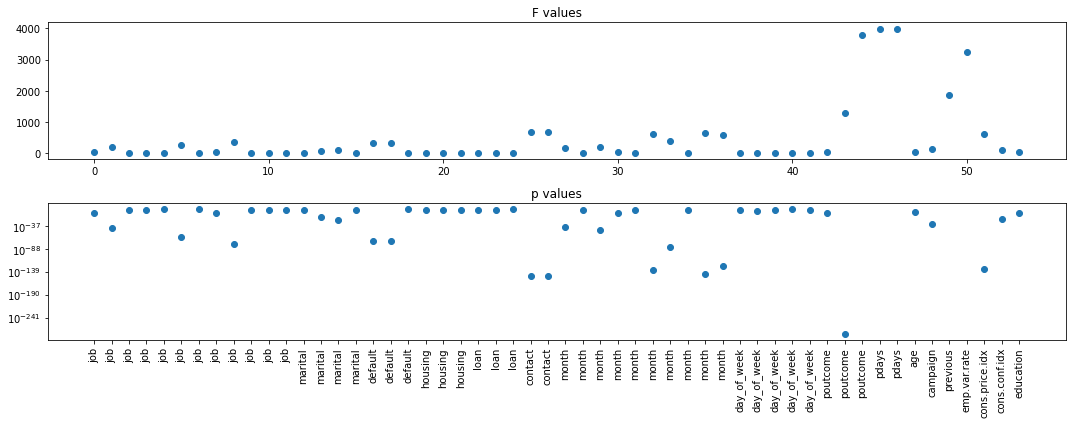

In [27]:
## Plot F-value & P-value

result_f = f_classif(X_train_enc_scale, y_train_tran)
result_f[0]

# plot graph f_value
fig, ax = plt.subplots(2, 1 , figsize=(15,6))
ax[0].set_title("F values")
ax[0].plot(result_f[0], 'o')
ax[1].set_title("p values")
ax[1].plot(result_f[1], 'o')
ax[1].set_yscale("log")

ax[1].set_xticks(range(len(preproc_X_col)))
ax[1].set_xticklabels(preproc_X_col, rotation=90);
fig.tight_layout()

Plot RFE(LogisticRegression) & F-value & Mutual Information
- Mutual Information can determined non-linear importance : high value show high importance

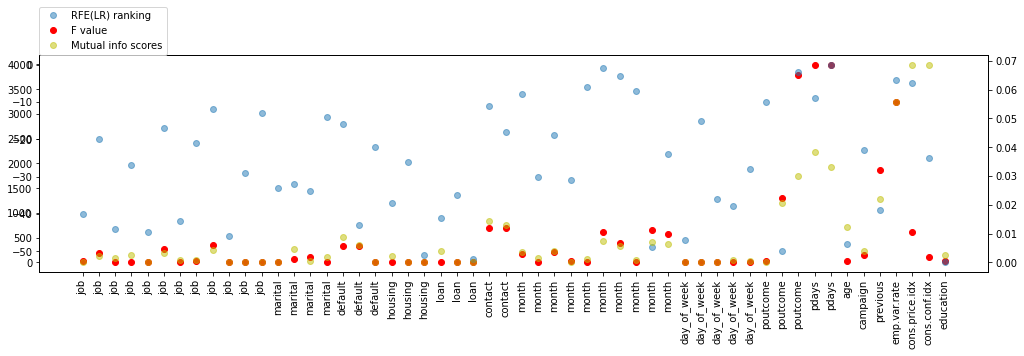

In [28]:
## Plot RFE(LogisticRegression) & F-value & MutualInformation

# create ranking among all features by selecting only one
rfe = RFE(LogisticRegression(max_iter=1000, random_state=0), n_features_to_select=1)
rfe.fit(X_train_enc_scale, y_train_tran)

fig = plt.figure(figsize=(17,4))
plt.xticks(range(len(preproc_X_col)), preproc_X_col, rotation=90)

line_f, = plt.plot(result_f[0], 'o', c='r')

ax2 = plt.twinx()
line_rfe, = ax2.plot(1 - rfe.ranking_, 'o', alpha=.5)

ax4 = plt.twinx()
scores = mutual_info_classif(X_train_enc_scale, y_train_tran)
line_mi, = ax4.plot(scores, 'o', c='y', alpha=.5)

plt.legend([line_rfe, line_f, line_mi], ["RFE(LR) ranking", "F value", "Mutual info scores"], loc=(0, 1))

Explore 20-best features from F-value & Mutual Information

In [29]:
## select 20 best features by F-value, MutualInformation

# select 20 k-best with f-value
select_k = SelectKBest(k=20, score_func=f_classif)
select_k.fit(X_train_enc_scale, y_train_tran)
cols = select_k.get_support(indices=True)
list_col_k_f = [preproc_X_col[i] for i in cols]
print(list_col_k_f)

# select 20 k-best with mutual info
select_k = SelectKBest(k=20, score_func=mutual_info_classif)
select_k.fit(X_train_enc_scale, y_train_tran)
cols = select_k.get_support(indices=True)
list_col_k_mi = [preproc_X_col[i] for i in cols]
print(list_col_k_mi)

['job', 'job', 'job', 'default', 'default', 'contact', 'contact', 'month', 'month', 'month', 'month', 'month', 'month', 'poutcome', 'poutcome', 'pdays', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx']
['job', 'marital', 'default', 'default', 'contact', 'contact', 'month', 'month', 'month', 'month', 'poutcome', 'poutcome', 'pdays', 'pdays', 'age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx']


Create pipeline for best features of **LogisticRegression**
 - This pre-process pipeline is created based on feature importance from LogisticRegression

In [30]:
## create pipeline for LR best features

# select 20 best with RFE(LogisticRegression)
rfe = RFE(LogisticRegression(max_iter=1000, random_state=0), n_features_to_select=20)
rfe.fit(X_train_enc_scale, y_train_tran)
list_col_rfe_lr = [preproc_X_col[i] for i, val in enumerate(rfe.support_) if val]

col_interest_lr = set(list_col_rfe_lr)
print(col_interest_lr)

# declare pipeline for data pre-procession
pipe_cate = Pipeline([('imputer',SimpleImputer(strategy='most_frequent')), ('onehot',OneHotEncoder(handle_unknown='ignore', sparse=False))])
pipe_num = Pipeline([('imputer',SimpleImputer(strategy='mean')), ('std',StandardScaler())])

# declare columnTransformer to include these above pipelines
preproc_X_lr = ColumnTransformer([
     ('cate', pipe_cate, ['job', 'marital', 'default', 'contact', 'month', 'day_of_week', 'poutcome', 'pdays']),
     ('norm', pipe_num, ['cons.price.idx', 'emp.var.rate'])
     ], remainder='passthrough')

{'job', 'marital', 'poutcome', 'emp.var.rate', 'month', 'pdays', 'cons.price.idx', 'contact', 'day_of_week', 'default'}


Create pipeline for best features of **RandomForestClassifier**
 - This pre-process pipeline is created based on feature importance from RandonForest

In [31]:
## create pipeline for RF best features

# select 10 best with RFE(RandomForest)
rfe = RFE(RandomForestClassifier(random_state=0), n_features_to_select=10)
rfe.fit(X_train_enc_scale, y_train_tran)
list_col_rfe_rf = [preproc_X_col[i] for i, val in enumerate(rfe.support_) if val]

col_interest_rf = set(list_col_rfe_rf)
print(col_interest_rf)

# declare pipeline for data pre-procession
pipe_cate = Pipeline([('imputer',SimpleImputer(strategy='most_frequent')), ('onehot',OneHotEncoder(handle_unknown='ignore', sparse=False))])
pipe_num = Pipeline([('imputer',SimpleImputer(strategy='mean')), ('std',StandardScaler())])

# declare columnTransformer to include these above pipelines
preproc_X_rf = ColumnTransformer([
     ('cate', pipe_cate, ['housing', 'pdays']),
     ('norm', pipe_num, ['cons.conf.idx', 'cons.price.idx', 'age', 'emp.var.rate', 'previous', 'campaign']),
     ('ord', pipe_ord, ['education'])
     ], remainder='passthrough')

{'emp.var.rate', 'previous', 'cons.conf.idx', 'pdays', 'education', 'cons.price.idx', 'housing', 'campaign', 'age'}


Create pipeline for best **general** features
 - Average feature importance from F-value & MI & LR & RF

In [32]:
## create pipeline for general best features

# Create the list of general best features (from 4 methods above)
tmp_dict_interest = dict(Counter(list_col_k_f + list_col_k_mi + list_col_rfe_lr + list_col_rfe_rf))
tmp_list_interest = sorted(((v, k) for (k,v) in tmp_dict_interest.items()), reverse=True)
dict_col_interest = dict((k,v) for v,k in tmp_list_interest)
col_interest = [key for key, count in dict_col_interest.items() if count >= 3]
print(col_interest)

# declare pipeline for data pre-procession
pipe_cate = Pipeline([('imputer',SimpleImputer(strategy='most_frequent')), ('onehot',OneHotEncoder(handle_unknown='ignore', sparse=False))])
pipe_num = Pipeline([('imputer',SimpleImputer(strategy='mean')), ('std',StandardScaler())])

# declare columnTransformer to include these above pipelines
preproc_X_interest = ColumnTransformer([
     ('cate', pipe_cate, ['job', 'default', 'contact', 'month', 'poutcome', 'pdays']),
     ('norm', pipe_num, ['emp.var.rate', 'cons.price.idx', 'previous'])
     ], remainder='passthrough')

['month', 'pdays', 'job', 'poutcome', 'contact', 'default', 'emp.var.rate', 'cons.price.idx', 'previous']


# **Create model(GridSearchCV)**

1. KNN (all features) - Best 'Recall' score from last experiment

In [33]:
# KNN - based model
knn = KNeighborsClassifier()

pipe_knn = Pipeline([('prepro',preproc_X), ('knn',knn)])
param_grid = {'knn__n_neighbors':[5,9,15,19,25,29]}

knn_dft_all = GridSearchCV(pipe_knn, param_grid=param_grid, cv=5,scoring='recall')
knn_dft_all.fit(X_train, y_train_tran)

predict_knn_dft_all = knn_dft_all.predict(X_test)

print("Best Param :", knn_dft_all.best_params_)
print("Train Accuracy :", knn_dft_all.best_score_)
print("Test Accuracy :", accuracy_score(y_test_tran, predict_knn_dft_all), '\n')
print("Classification Report :\n", classification_report(y_test_tran, predict_knn_dft_all), '\n')

Best Param : {'knn__n_neighbors': 5}
Train Accuracy : 0.2747831512807769
Test Accuracy : 0.8855304685603301 

Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.96      0.94      7310
           1       0.49      0.27      0.34       928

    accuracy                           0.89      8238
   macro avg       0.70      0.62      0.64      8238
weighted avg       0.86      0.89      0.87      8238
 



2. KNN (general best features)

In [34]:
# KNN with general best features
knn = KNeighborsClassifier()

pipe_knn = Pipeline([('prepro',preproc_X_interest), ('knn',knn)])
param_grid = {'knn__n_neighbors':[5,9,15,19,25,29]}

knn_dft_best = GridSearchCV(pipe_knn, param_grid=param_grid, cv=5, scoring='recall')
knn_dft_best.fit(X_train[col_interest], y_train_tran)

predict_knn_dft_best = knn_dft_best.predict(X_test[col_interest])

print("Best Param :", knn_dft_best.best_params_)
print("Train Accuracy :", knn_dft_best.best_score_)
print("Test Accuracy :", accuracy_score(y_test_tran, predict_knn_dft_best), '\n')
print("Classification Report :\n", classification_report(y_test_tran, predict_knn_dft_best), '\n')

Best Param : {'knn__n_neighbors': 5}
Train Accuracy : 0.2906694285931951
Test Accuracy : 0.8880796309783928 

Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.96      0.94      7310
           1       0.51      0.29      0.37       928

    accuracy                           0.89      8238
   macro avg       0.71      0.63      0.65      8238
weighted avg       0.87      0.89      0.87      8238
 



3. LogisticRegression (all features)

In [35]:
# LR
lr = LogisticRegression(solver='liblinear', max_iter=1000, random_state=0)

pipe_lr = Pipeline([('prepro',preproc_X), ('lr',lr)])
param_grid = {'lr__C': np.logspace(-3,3,10), 'lr__penalty': ['l1','l2']}

lr_dft_all = GridSearchCV(pipe_lr, param_grid=param_grid, cv=5, scoring='recall')
lr_dft_all.fit(X_train, y_train_tran)

predict_lr_dft_all = lr_dft_all.predict(X_test)

print("Best Param :", lr_dft_all.best_params_)
print("Train Accuracy :", lr_dft_all.best_score_)
print("Test Accuracy :", accuracy_score(y_test_tran, predict_lr_dft_all), '\n')
print("Classification Report :\n", classification_report(y_test_tran, predict_lr_dft_all), '\n')

Best Param : {'lr__C': 10.0, 'lr__penalty': 'l2'}
Train Accuracy : 0.2289853547757507
Test Accuracy : 0.8998543335761107 

Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      7310
           1       0.65      0.23      0.35       928

    accuracy                           0.90      8238
   macro avg       0.78      0.61      0.65      8238
weighted avg       0.88      0.90      0.88      8238
 



4. LogisticRegression (general best features)

In [36]:
# LR with general best features
lr = LogisticRegression(solver='liblinear', max_iter=1000, random_state=0)

pipe_lr = Pipeline([('prepro',preproc_X_interest), ('lr',lr)])
param_grid = {}

lr_dft_best = GridSearchCV(pipe_lr, param_grid=param_grid, cv=5, scoring='recall')
lr_dft_best.fit(X_train[col_interest], y_train_tran)

predict_lr_dft_best = lr_dft_best.predict(X_test[col_interest])

print("Train Accuracy :", lr_dft_best.best_score_)
print("Test Accuracy :", accuracy_score(y_test_tran, predict_lr_dft_best), '\n')
print("Classification Report :\n", classification_report(y_test_tran, predict_lr_dft_best), '\n')

Train Accuracy : 0.22521394651971863
Test Accuracy : 0.8976693372177713 

Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7310
           1       0.64      0.21      0.32       928

    accuracy                           0.90      8238
   macro avg       0.77      0.60      0.63      8238
weighted avg       0.88      0.90      0.87      8238
 



5. LogisticRegression (LR best features)

In [37]:
# LR with LR best features
lr = LogisticRegression(solver='liblinear', max_iter=1000, random_state=0)

pipe_lr = Pipeline([('prepro',preproc_X_lr), ('lr',lr)])
param_grid = {}

lr_dft_lr = GridSearchCV(pipe_lr, param_grid=param_grid, cv=5, scoring='recall')
lr_dft_lr.fit(X_train[col_interest_lr], y_train_tran)

predict_lr_dft_lr = lr_dft_lr.predict(X_test[col_interest_lr])

print("Train Accuracy :", lr_dft_lr.best_score_)
print("Test Accuracy :", accuracy_score(y_test_tran, predict_lr_dft_lr), '\n')
print("Classification Report :\n", classification_report(y_test_tran, predict_lr_dft_lr), '\n')

Train Accuracy : 0.22359705862080226
Test Accuracy : 0.8988832240835154 

Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.65      0.22      0.33       928

    accuracy                           0.90      8238
   macro avg       0.78      0.60      0.64      8238
weighted avg       0.88      0.90      0.88      8238
 



6. SVM (general best features)

In [38]:
# SVM with general best features
svc = SVC()

pipe_svc = Pipeline([('prepro',preproc_X_interest), ('svc',svc)])
param_grid = {}

svc_dft_best = GridSearchCV(pipe_svc, param_grid=param_grid, cv=5)
svc_dft_best.fit(X_train[col_interest],y_train_tran)

predict_svc_dft_best = svc_dft_best.predict(X_test[col_interest])

print("Train Accuracy :", svc_dft_best.best_score_)
print("Test Accuracy :", accuracy_score(y_test_tran, predict_svc_dft_best), '\n')
print("Classification Report :\n", classification_report(y_test_tran, predict_svc_dft_best), '\n')

Train Accuracy : 0.901183611532625
Test Accuracy : 0.8997329448895363 

Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      7310
           1       0.63      0.26      0.37       928

    accuracy                           0.90      8238
   macro avg       0.77      0.62      0.66      8238
weighted avg       0.88      0.90      0.88      8238
 



7. RandomForest with default param (all features)

In [39]:
# RF
rf = RandomForestClassifier(warm_start=True, random_state=0)

pipe_rf = Pipeline([('prepro',preproc_X), ('rf',rf)])
param_grid = {}

rf_dft_all = GridSearchCV(pipe_rf, param_grid=param_grid, cv=5, scoring=('recall'))
rf_dft_all.fit(X_train, y_train_tran)

predict_rf_dft_all = rf_dft_all.predict(X_test)

print("Train Accuracy :", rf_dft_all.best_score_)
print("Test Accuracy :", accuracy_score(y_test_tran, predict_rf_dft_all), '\n')
print("Classification Report :\n", classification_report(y_test_tran, predict_rf_dft_all), '\n')

Train Accuracy : 0.28852252650977867
Test Accuracy : 0.8875940762320952 

Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7310
           1       0.50      0.28      0.36       928

    accuracy                           0.89      8238
   macro avg       0.71      0.62      0.65      8238
weighted avg       0.87      0.89      0.87      8238
 



8. RandomForest (general best features)

In [40]:
# RF with general best features
rf = RandomForestClassifier(warm_start=True, random_state=0)

pipe_rf = Pipeline([('prepro',preproc_X_interest), ('rf',rf)])
param_grid = {'rf__n_estimators': [100,150,200]}

rf_dft_best = GridSearchCV(pipe_rf, param_grid=param_grid, cv=5, scoring=('recall'))
rf_dft_best.fit(X_train[col_interest], y_train_tran)

predict_rf_dft_best = rf_dft_best.predict(X_test[col_interest])

print("Best Param :", rf_dft_best.best_params_)
print("Train Accuracy :", rf_dft_best.best_score_)
print("Test Accuracy :", accuracy_score(y_test_tran, predict_rf_dft_best), '\n')
print("Classification Report :\n", classification_report(y_test_tran, predict_rf_dft_best), '\n')

Best Param : {'rf__n_estimators': 100}
Train Accuracy : 0.2632041008078998
Test Accuracy : 0.8929351784413693 

Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7310
           1       0.56      0.25      0.34       928

    accuracy                           0.89      8238
   macro avg       0.73      0.61      0.64      8238
weighted avg       0.87      0.89      0.87      8238
 



9. RandomForest (RF best features)

In [41]:
# RF with RF best features
rf = RandomForestClassifier(warm_start=True, random_state=0)

pipe_rf = Pipeline([('prepro',preproc_X_rf), ('rf',rf)])
param_grid = {'rf__n_estimators': [100,150,200]}

rf_dft_rf = GridSearchCV(pipe_rf, param_grid=param_grid, cv=5, scoring=('recall'))
rf_dft_rf.fit(X_train[col_interest_rf], y_train_tran)

predict_rf_dft_rf = rf_dft_rf.predict(X_test[col_interest_rf])

print("Best Param :", rf_dft_rf.best_params_)
print("Train Accuracy :", rf_dft_rf.best_score_)
print("Test Accuracy :", accuracy_score(y_test_tran, predict_rf_dft_rf), '\n')
print("Classification Report :\n", classification_report(y_test_tran, predict_rf_dft_rf), '\n')

Best Param : {'rf__n_estimators': 150}
Train Accuracy : 0.29013868885881894
Test Accuracy : 0.8814032532168002 

Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.96      0.93      7310
           1       0.46      0.29      0.36       928

    accuracy                           0.88      8238
   macro avg       0.69      0.62      0.65      8238
weighted avg       0.86      0.88      0.87      8238
 



10. Adaboost (all features)

In [42]:
# Adaboost
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,random_state=0))

pipe_ada = Pipeline([('prepro',preproc_X), ('ada',ada)])
param_grid = {}

ada_dft_all = GridSearchCV(pipe_ada, param_grid=param_grid, cv=5, scoring=('recall'))
ada_dft_all.fit(X_train, y_train_tran)

predict_ada_dft_all = ada_dft_all.predict(X_test)

print("Train Accuracy :", ada_dft_all.best_score_)
print("Test Accuracy :", accuracy_score(y_test_tran, predict_ada_dft_all), '\n')
print("Classification Report :\n", classification_report(y_test_tran, predict_ada_dft_all), '\n')

Train Accuracy : 0.2524246062984985
Test Accuracy : 0.8983976693372178 

Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7310
           1       0.62      0.25      0.36       928

    accuracy                           0.90      8238
   macro avg       0.77      0.62      0.65      8238
weighted avg       0.88      0.90      0.88      8238
 



11. Adaboost (general best features)

In [43]:
# Adaboost with general best features
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,random_state=0))

pipe_ada = Pipeline([('prepro',preproc_X_interest), ('ada',ada)])
param_grid = {}

ada_dft_best = GridSearchCV(pipe_ada, param_grid=param_grid, cv=5, scoring=('recall'))
ada_dft_best.fit(X_train[col_interest], y_train_tran)

predict_ada_dft_best = ada_dft_best.predict(X_test[col_interest])

print("Train Accuracy :", ada_dft_best.best_score_)
print("Test Accuracy :", accuracy_score(y_test_tran, predict_ada_dft_best), '\n')
print("Classification Report :\n", classification_report(y_test_tran, predict_ada_dft_best), '\n')

Train Accuracy : 0.23706652929589014
Test Accuracy : 0.8980335032774945 

Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7310
           1       0.63      0.23      0.34       928

    accuracy                           0.90      8238
   macro avg       0.77      0.61      0.64      8238
weighted avg       0.88      0.90      0.88      8238
 



12. Adaboost (RF best features)

In [44]:
# Adaboost with RF best features
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,random_state=0))

pipe_ada = Pipeline([('prepro',preproc_X_rf), ('ada',ada)])
param_grid = {}

ada_dft_rf = GridSearchCV(pipe_ada, param_grid=param_grid, cv=5, scoring=('recall'))
ada_dft_rf.fit(X_train[col_interest_rf], y_train_tran)

predict_ada_dft_rf = ada_dft_rf.predict(X_test[col_interest_rf])

print("Train Accuracy :", ada_dft_rf.best_score_)
print("Test Accuracy :", accuracy_score(y_test_tran, predict_ada_dft_rf), '\n')
print("Classification Report :\n", classification_report(y_test_tran, predict_ada_dft_rf), '\n')

Train Accuracy : 0.22709965064773466
Test Accuracy : 0.8988832240835154 

Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      7310
           1       0.65      0.22      0.33       928

    accuracy                           0.90      8238
   macro avg       0.78      0.60      0.64      8238
weighted avg       0.88      0.90      0.88      8238
 



Plot some of the best result from feature selection

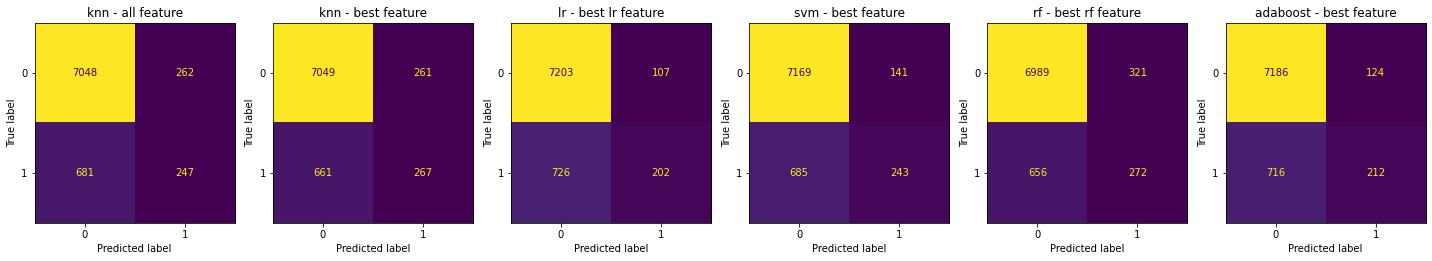

In [45]:
# Plot some of best result from feature selection
fig, axes = plt.subplots(1, 6, figsize=(20, 4))

ConfusionMatrixDisplay.from_estimator(knn_dft_all, X_test, y_test_tran, ax=axes[0], colorbar=False)
ConfusionMatrixDisplay.from_estimator(knn_dft_best, X_test, y_test_tran, ax=axes[1], colorbar=False)
ConfusionMatrixDisplay.from_estimator(lr_dft_lr, X_test, y_test_tran, ax=axes[2], colorbar=False)
ConfusionMatrixDisplay.from_estimator(svc_dft_best, X_test, y_test_tran, ax=axes[3], colorbar=False)
ConfusionMatrixDisplay.from_estimator(rf_dft_rf, X_test, y_test_tran, ax=axes[4], colorbar=False)
ConfusionMatrixDisplay.from_estimator(ada_dft_best, X_test, y_test_tran, ax=axes[5], colorbar=False)

axes[0].set_title("knn - all feature")
axes[1].set_title("knn - best feature")
axes[2].set_title("lr - best lr feature")
axes[3].set_title("svm - best feature")
axes[4].set_title("rf - best rf feature")
axes[5].set_title("adaboost - best feature")

plt.tight_layout()

# **Handling imbalance data**

**SOMTE**

13. SMOTE + KNN (general best features)

In [46]:
# SMOTE + KNN + general best features
knn = KNeighborsClassifier()
pipe_smote_knn = make_imb_pipeline(preproc_X_interest, SMOTE(random_state=0), knn)

param_grid = {'smote__k_neighbors': [21,23,25]}
grid_smote_knn_best = GridSearchCV(pipe_smote_knn, param_grid, cv=5, scoring=('recall'))
grid_smote_knn_best.fit(X_train[col_interest], y_train_tran)

predict_grid_smote_knn_best = grid_smote_knn_best.predict(X_test[col_interest])

print("Best Param :", grid_smote_knn_best.best_params_)
print("Train Accuracy :", grid_smote_knn_best.best_score_)
print("Test Accuracy :", accuracy_score(y_test_tran, predict_grid_smote_knn_best), '\n')
print("Classification Report :\n", classification_report(y_test_tran, predict_grid_smote_knn_best))

Best Param : {'smote__k_neighbors': 23}
Train Accuracy : 0.5344705118391601
Test Accuracy : 0.7609856761349842 

Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.79      0.85      7310
           1       0.25      0.57      0.35       928

    accuracy                           0.76      8238
   macro avg       0.59      0.68      0.60      8238
weighted avg       0.86      0.76      0.80      8238



14. SMOTE + LogisticRegression (general best features)

In [47]:
# SMOTE + LR + general best features
lr = LogisticRegression(solver='liblinear', max_iter=1000, random_state=0)
pipe_smote_lr = make_imb_pipeline(preproc_X_interest, SMOTE(random_state=0), lr)

param_grid = {'smote__k_neighbors': [21,23,25]}
grid_smote_lr_best = GridSearchCV(pipe_smote_lr, param_grid, cv=5, scoring=('recall'))
grid_smote_lr_best.fit(X_train[col_interest], y_train_tran)

predict_grid_smote_lr_best = grid_smote_lr_best.predict(X_test[col_interest])

print("Best Param :", grid_smote_lr_best.best_params_)
print("Train Accuracy :", grid_smote_lr_best.best_score_)
print("Test Accuracy :", accuracy_score(y_test_tran, predict_grid_smote_lr_best), '\n')
print("Classification Report :\n", classification_report(y_test_tran, predict_grid_smote_lr_best))

Best Param : {'smote__k_neighbors': 23}
Train Accuracy : 0.6645920777209028
Test Accuracy : 0.7918184025248847 

Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.81      0.87      7310
           1       0.31      0.66      0.42       928

    accuracy                           0.79      8238
   macro avg       0.63      0.74      0.65      8238
weighted avg       0.88      0.79      0.82      8238



15. SMOTE + LogisticRegression (LR best features)

In [48]:
# SMOTE + LR + LR best features
lr = LogisticRegression(solver='liblinear', max_iter=1000, random_state=0)
pipe_smote_lr = make_imb_pipeline(preproc_X_lr, SMOTE(random_state=0), lr)

param_grid = {'smote__k_neighbors': [21,23,25]}
grid_smote_lr_lr = GridSearchCV(pipe_smote_lr, param_grid, cv=5, scoring=('recall'))
grid_smote_lr_lr.fit(X_train[col_interest_lr], y_train_tran)

predict_grid_smote_lr_lr = grid_smote_lr_lr.predict(X_test[col_interest_lr])

print("Best Param :", grid_smote_lr_lr.best_params_)
print("Train Accuracy :", grid_smote_lr_lr.best_score_)
print("Test Accuracy :", accuracy_score(y_test_tran, predict_grid_smote_lr_lr), '\n')
print("Classification Report :\n", classification_report(y_test_tran, predict_grid_smote_lr_lr))

Best Param : {'smote__k_neighbors': 23}
Train Accuracy : 0.6662136816940138
Test Accuracy : 0.7959456178684147 

Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.81      0.88      7310
           1       0.31      0.66      0.42       928

    accuracy                           0.80      8238
   macro avg       0.63      0.74      0.65      8238
weighted avg       0.88      0.80      0.82      8238



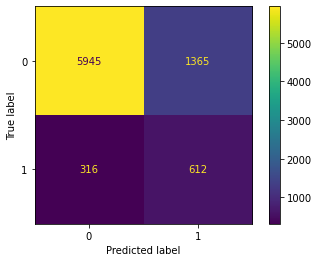

In [49]:
ConfusionMatrixDisplay.from_predictions(y_test_tran, predict_grid_smote_lr_lr)

16. SMOTE + RandomForest (general best features)

In [50]:
# SMOTE + RF + general best features
rf = RandomForestClassifier(warm_start=True, random_state=0)
pipe_smote_rf = make_imb_pipeline(preproc_X_interest, SMOTE(random_state=0, k_neighbors=23), rf)

param_grid = {}
grid_smote_rf_best = GridSearchCV(pipe_smote_rf, param_grid=param_grid, cv=5, scoring=('recall'))
grid_smote_rf_best.fit(X_train[col_interest], y_train_tran)

predict_grid_smote_rf_best = grid_smote_rf_best.predict(X_test[col_interest])

print("Train Accuracy :", grid_smote_rf_best.best_score_)
print("Test Accuracy :", accuracy_score(y_test_tran, predict_grid_smote_rf_best), '\n')
print("Classification Report :\n", classification_report(y_test_tran, predict_grid_smote_rf_best), '\n')

Train Accuracy : 0.43857567303820383
Test Accuracy : 0.8543335761107065 

Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.90      0.92      7310
           1       0.38      0.47      0.42       928

    accuracy                           0.85      8238
   macro avg       0.66      0.69      0.67      8238
weighted avg       0.87      0.85      0.86      8238
 



17. SMOTE + RandomForest (RF best features)

In [51]:
# SMOTE + RF + RF best features
rf = RandomForestClassifier(warm_start=True, random_state=0, n_estimators=150)
pipe_smote_rf = make_imb_pipeline(preproc_X_rf, SMOTE(random_state=0, k_neighbors=23), rf)

param_grid = {}
grid_smote_rf_rf = GridSearchCV(pipe_smote_rf, param_grid=param_grid, cv=5, scoring=('recall'))
grid_smote_rf_rf.fit(X_train[col_interest_rf], y_train_tran)

predict_grid_smote_rf_rf = grid_smote_rf_rf.predict(X_test[col_interest_rf])

print("Train Accuracy :", grid_smote_rf_rf.best_score_)
print("Test Accuracy :", accuracy_score(y_test_tran, predict_grid_smote_rf_rf), '\n')
print("Classification Report :\n", classification_report(y_test_tran, predict_grid_smote_rf_rf), '\n')

Train Accuracy : 0.3437521086293275
Test Accuracy : 0.8696285506190823 

Classification Report :
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      7310
           1       0.41      0.34      0.37       928

    accuracy                           0.87      8238
   macro avg       0.66      0.64      0.65      8238
weighted avg       0.86      0.87      0.86      8238
 



**RandomUnderSampler**

18. Under + KNN (general best features)

In [52]:
# RandomUnderSampler + KNN + general best features
knn = KNeighborsClassifier()
pipe_under_knn = make_imb_pipeline(preproc_X_interest, RandomUnderSampler(), knn)

param_grid = {}
grid_under_knn_best = GridSearchCV(pipe_under_knn, param_grid, cv=5, return_train_score=True, scoring=('recall'))
grid_under_knn_best.fit(X_train[col_interest], y_train_tran)

predict_grid_under_knn_best = grid_under_knn_best.predict(X_test[col_interest])

print("Train Accuracy :", grid_under_knn_best.best_score_)
print("Test Accuracy :", accuracy_score(y_test_tran, predict_grid_under_knn_best), '\n')
print("Classification Report :\n", classification_report(y_test_tran, predict_grid_under_knn_best))

Train Accuracy : 0.671065070940639
Test Accuracy : 0.7087885409079874 

Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.71      0.81      7310
           1       0.23      0.69      0.35       928

    accuracy                           0.71      8238
   macro avg       0.59      0.70      0.58      8238
weighted avg       0.87      0.71      0.76      8238



19. Under + LogisticRegression (general best features)

In [53]:
# RandomUnderSampler + LR + general best features
logreg = LogisticRegression(random_state=0, solver='liblinear', max_iter=1000)
pipe_under_lr = make_imb_pipeline(preproc_X_interest, RandomUnderSampler(), logreg)

param_grid = {}
grid_under_lr_best = GridSearchCV(pipe_under_lr, param_grid, cv=5, scoring=('recall'))
grid_under_lr_best.fit(X_train[col_interest], y_train_tran)

predict_grid_under_lr_best = grid_under_lr_best.predict(X_test[col_interest])

print("Train Accuracy :", grid_under_lr_best.best_score_)
print("Test Accuracy :", accuracy_score(y_test_tran, predict_grid_under_lr_best), '\n')
print("Classification Report :\n", classification_report(y_test_tran, predict_grid_under_lr_best))

Train Accuracy : 0.6416955375054869
Test Accuracy : 0.809905316824472 

Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.83      0.89      7310
           1       0.32      0.64      0.43       928

    accuracy                           0.81      8238
   macro avg       0.64      0.73      0.66      8238
weighted avg       0.88      0.81      0.83      8238



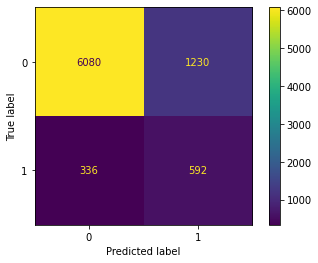

In [54]:
ConfusionMatrixDisplay.from_predictions(y_test_tran, predict_grid_under_lr_best)

20. Under + LogisticRegression (LR best features)

In [55]:
# RandomUnderSampler + LR + LR best features
logreg = LogisticRegression(random_state=0, solver='liblinear', max_iter=1000)
pipe_under_lr = make_imb_pipeline(preproc_X_lr, RandomUnderSampler(), logreg)

param_grid = {}
grid_under_lr_lr = GridSearchCV(pipe_under_lr, param_grid, cv=5, scoring=('recall'))
grid_under_lr_lr.fit(X_train[col_interest_lr], y_train_tran)

predict_grid_under_lr_lr = grid_under_lr_lr.predict(X_test[col_interest_lr])

print("Train Accuracy :", grid_under_lr_lr.best_score_)
print("Test Accuracy :", accuracy_score(y_test_tran, predict_grid_under_lr_lr), '\n')
print("Classification Report :\n", classification_report(y_test_tran, predict_grid_under_lr_lr))

Train Accuracy : 0.6441214135162687
Test Accuracy : 0.8071133770332605 

Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.83      0.88      7310
           1       0.32      0.64      0.43       928

    accuracy                           0.81      8238
   macro avg       0.64      0.74      0.66      8238
weighted avg       0.88      0.81      0.83      8238



21. Under + RandomForest (general best features)

In [56]:
# RandomUnderSampler + RF + general best features
rf = RandomForestClassifier(warm_start=True, random_state=0)
pipe_under_rf = make_imb_pipeline(preproc_X_interest, RandomUnderSampler(), rf)

param_grid = {}
grid_under_rf_best = GridSearchCV(pipe_under_rf, param_grid=param_grid, cv=5, scoring=('recall'))
grid_under_rf_best.fit(X_train[col_interest], y_train_tran)

predict_grid_under_rf_best = grid_under_rf_best.predict(X_test[col_interest])

print("Train Accuracy :", grid_under_rf_best.best_score_)
print("Test Accuracy :", accuracy_score(y_test_tran, predict_grid_under_rf_best), '\n')
print("Classification Report :\n", classification_report(y_test_tran, predict_grid_under_rf_best), '\n')

Train Accuracy : 0.6290296133181934
Test Accuracy : 0.8046856033017723 

Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.83      0.88      7310
           1       0.31      0.62      0.42       928

    accuracy                           0.80      8238
   macro avg       0.63      0.72      0.65      8238
weighted avg       0.87      0.80      0.83      8238
 



22. Under + RandomForest (RF best features)

In [57]:
# RandomUnderSampler + RF + RF best features
rf = RandomForestClassifier(warm_start=True, random_state=0)
pipe_under_rf = make_imb_pipeline(preproc_X_rf, RandomUnderSampler(), rf)

param_grid = {}
grid_under_rf_rf = GridSearchCV(pipe_under_rf, param_grid=param_grid, cv=5, scoring=('recall'))
grid_under_rf_rf.fit(X_train[col_interest_rf], y_train_tran)

predict_grid_under_rf_rf = grid_under_rf_rf.predict(X_test[col_interest_rf])

print("Train Accuracy :", grid_under_rf_rf.best_score_)
print("Test Accuracy :", accuracy_score(y_test_tran, predict_grid_under_rf_rf), '\n')
print("Classification Report :\n", classification_report(y_test_tran, predict_grid_under_rf_rf), '\n')

Train Accuracy : 0.6519392134313792
Test Accuracy : 0.7040543821315853 

Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.71      0.81      7310
           1       0.22      0.66      0.34       928

    accuracy                           0.70      8238
   macro avg       0.58      0.69      0.57      8238
weighted avg       0.86      0.70      0.76      8238
 



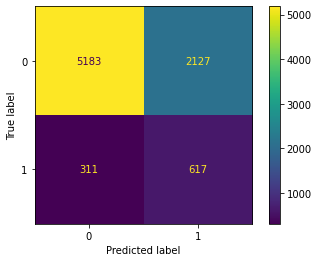

In [58]:
ConfusionMatrixDisplay.from_predictions(y_test_tran, predict_grid_under_rf_rf)

**EnsembleResampling**

23. EnsembleResampling with tuning the number of features

In [59]:
# Ensemble Resampling
pipe_resam = make_imb_pipeline(preproc_X, BalancedRandomForestClassifier(random_state=0))

param_grid = {'balancedrandomforestclassifier__max_features': ['auto','sqrt','log2']}
grid_resam_all = GridSearchCV(pipe_resam, param_grid, cv=5, scoring=('recall'))
grid_resam_all.fit(X_train, y_train_tran)

predict_grid_resam_all = grid_resam_all.predict(X_test)

print("Best Param :", grid_resam_all.best_params_)
print("Train Accuracy :", grid_resam_all.best_score_)
print("Test Accuracy :", accuracy_score(y_test_tran, predict_grid_resam_all), '\n')
print("Classification Report :\n", classification_report(y_test_tran, predict_grid_resam_all))

Best Param : {'balancedrandomforestclassifier__max_features': 'log2'}
Train Accuracy : 0.6635186266791944
Test Accuracy : 0.7861131342558874 

Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.80      0.87      7310
           1       0.30      0.66      0.41       928

    accuracy                           0.79      8238
   macro avg       0.62      0.73      0.64      8238
weighted avg       0.88      0.79      0.82      8238



24. EnsembleResampling (general best features)

In [60]:
# Ensemble Resampling + general best features
pipe_resam = make_imb_pipeline(preproc_X_interest, BalancedRandomForestClassifier(random_state=0))

param_grid = {}
grid_resam_best = GridSearchCV(pipe_resam, param_grid, cv=5, return_train_score=True, scoring=('recall'))
grid_resam_best.fit(X_train[col_interest], y_train_tran)

predict_grid_resam_best = grid_resam_best.predict(X_test[col_interest])

print("Train Accuracy :", grid_resam_best.best_score_)
print("Test Accuracy :", accuracy_score(y_test_tran, predict_grid_resam_best), '\n')
print("Classification Report :\n", classification_report(y_test_tran, predict_grid_resam_best))

Train Accuracy : 0.6414288979260158
Test Accuracy : 0.8058994901675164 

Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.83      0.88      7310
           1       0.32      0.64      0.43       928

    accuracy                           0.81      8238
   macro avg       0.63      0.73      0.65      8238
weighted avg       0.88      0.81      0.83      8238



25. EnsembleResampling (RF best features)

In [61]:
# Ensemble Resampling + RF best features
pipe_resam_rf = make_imb_pipeline(preproc_X_rf, BalancedRandomForestClassifier(random_state=0))

param_grid = {}
grid_resam_rf = GridSearchCV(pipe_resam_rf, param_grid, cv=5, scoring=('recall'))
grid_resam_rf.fit(X_train[col_interest_rf], y_train_tran)

predict_grid_resam_rf = grid_resam_rf.predict(X_test[col_interest_rf])

print("Train Accuracy :", grid_resam_rf.best_score_)
print("Test Accuracy :", accuracy_score(y_test_tran, predict_grid_resam_rf), '\n')
print("Classification Report :\n", classification_report(y_test_tran, predict_grid_resam_rf))

Train Accuracy : 0.6732188657478787
Test Accuracy : 0.7189851905802379 

Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.72      0.82      7310
           1       0.24      0.70      0.36       928

    accuracy                           0.72      8238
   macro avg       0.60      0.71      0.59      8238
weighted avg       0.87      0.72      0.77      8238



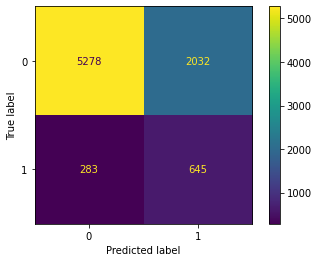

In [62]:
ConfusionMatrixDisplay.from_predictions(y_test_tran, predict_grid_resam_rf)

# **Plot the Confusion Matrix**

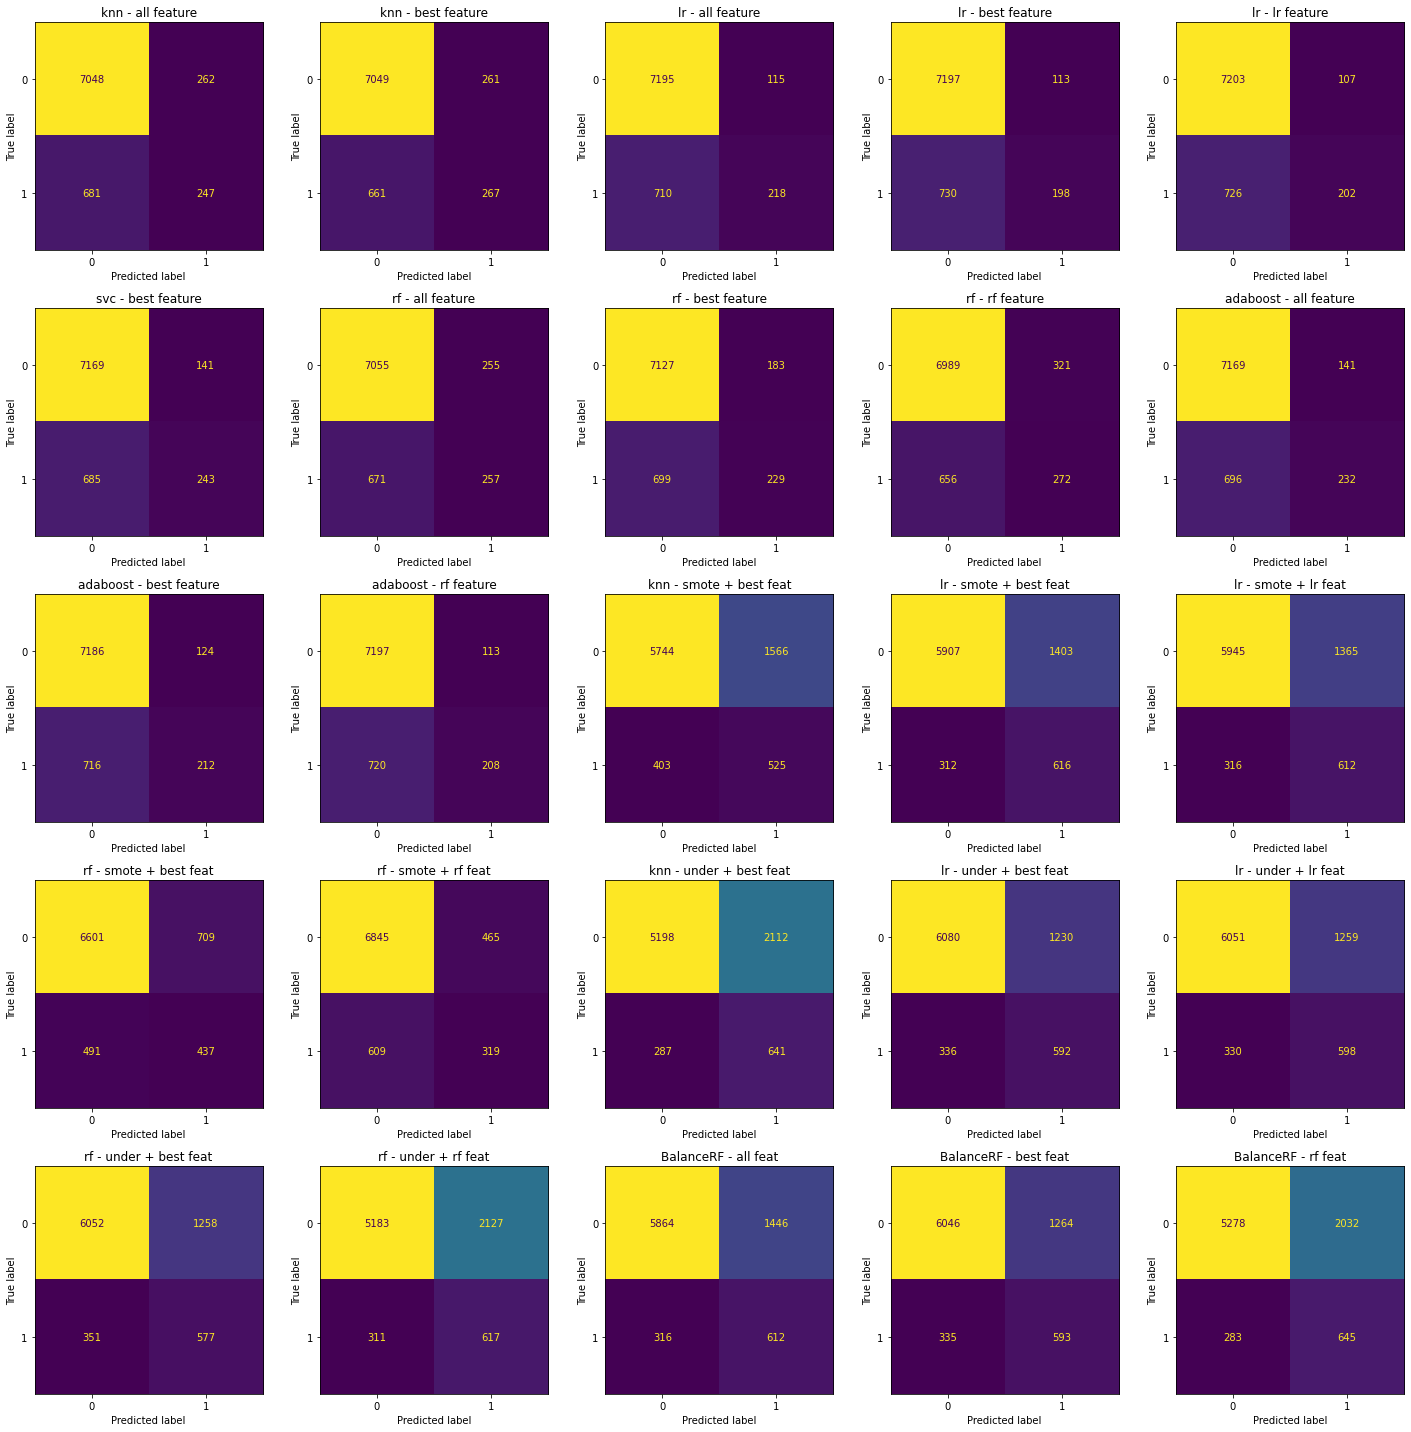

In [63]:
# Plot to see the confusion matrix for all models
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(5, 5, figsize=(20, 20))

ConfusionMatrixDisplay.from_estimator(knn_dft_all, X_test, y_test_tran, ax=axes[0,0], colorbar=False)
ConfusionMatrixDisplay.from_estimator(knn_dft_best, X_test[col_interest], y_test_tran, ax=axes[0,1], colorbar=False)
ConfusionMatrixDisplay.from_estimator(lr_dft_all, X_test, y_test_tran, ax=axes[0,2], colorbar=False)
ConfusionMatrixDisplay.from_estimator(lr_dft_best, X_test[col_interest], y_test_tran, ax=axes[0,3], colorbar=False)
ConfusionMatrixDisplay.from_estimator(lr_dft_lr, X_test[col_interest_lr], y_test_tran, ax=axes[0,4], colorbar=False)
ConfusionMatrixDisplay.from_estimator(svc_dft_best, X_test[col_interest], y_test_tran, ax=axes[1,0], colorbar=False)
ConfusionMatrixDisplay.from_estimator(rf_dft_all, X_test, y_test_tran, ax=axes[1,1], colorbar=False)
ConfusionMatrixDisplay.from_estimator(rf_dft_best, X_test[col_interest], y_test_tran, ax=axes[1,2], colorbar=False)
ConfusionMatrixDisplay.from_estimator(rf_dft_rf, X_test[col_interest_rf], y_test_tran, ax=axes[1,3], colorbar=False)
ConfusionMatrixDisplay.from_estimator(ada_dft_all, X_test, y_test_tran, ax=axes[1,4], colorbar=False)
ConfusionMatrixDisplay.from_estimator(ada_dft_best, X_test[col_interest], y_test_tran, ax=axes[2,0], colorbar=False)
ConfusionMatrixDisplay.from_estimator(ada_dft_rf, X_test[col_interest_rf], y_test_tran, ax=axes[2,1], colorbar=False)
ConfusionMatrixDisplay.from_estimator(grid_smote_knn_best, X_test[col_interest], y_test_tran, ax=axes[2,2], colorbar=False)
ConfusionMatrixDisplay.from_estimator(grid_smote_lr_best, X_test[col_interest], y_test_tran, ax=axes[2,3], colorbar=False)
ConfusionMatrixDisplay.from_estimator(grid_smote_lr_lr, X_test[col_interest_lr], y_test_tran, ax=axes[2,4], colorbar=False)
ConfusionMatrixDisplay.from_estimator(grid_smote_rf_best, X_test[col_interest], y_test_tran, ax=axes[3,0], colorbar=False)
ConfusionMatrixDisplay.from_estimator(grid_smote_rf_rf, X_test[col_interest_rf], y_test_tran, ax=axes[3,1], colorbar=False)
ConfusionMatrixDisplay.from_estimator(grid_under_knn_best, X_test[col_interest], y_test_tran, ax=axes[3,2], colorbar=False)
ConfusionMatrixDisplay.from_estimator(grid_under_lr_best, X_test[col_interest], y_test_tran, ax=axes[3,3], colorbar=False)
ConfusionMatrixDisplay.from_estimator(grid_under_lr_lr, X_test[col_interest_lr], y_test_tran, ax=axes[3,4], colorbar=False)
ConfusionMatrixDisplay.from_estimator(grid_under_rf_best, X_test[col_interest], y_test_tran, ax=axes[4,0], colorbar=False)
ConfusionMatrixDisplay.from_estimator(grid_under_rf_rf, X_test[col_interest_rf], y_test_tran, ax=axes[4,1], colorbar=False)
ConfusionMatrixDisplay.from_estimator(grid_resam_all, X_test, y_test_tran, ax=axes[4,2], colorbar=False)
ConfusionMatrixDisplay.from_estimator(grid_resam_best, X_test[col_interest], y_test_tran, ax=axes[4,3], colorbar=False)
ConfusionMatrixDisplay.from_estimator(grid_resam_rf, X_test[col_interest_rf], y_test_tran, ax=axes[4,4], colorbar=False)

axes[0,0].set_title("knn - all feature")
axes[0,1].set_title("knn - best feature")
axes[0,2].set_title("lr - all feature")
axes[0,3].set_title("lr - best feature")
axes[0,4].set_title("lr - lr feature")
axes[1,0].set_title("svc - best feature")
axes[1,1].set_title("rf - all feature")
axes[1,2].set_title("rf - best feature")
axes[1,3].set_title("rf - rf feature")
axes[1,4].set_title("adaboost - all feature")
axes[2,0].set_title("adaboost - best feature")
axes[2,1].set_title("adaboost - rf feature")
axes[2,2].set_title("knn - smote + best feat")
axes[2,3].set_title("lr - smote + best feat")
axes[2,4].set_title("lr - smote + lr feat")
axes[3,0].set_title("rf - smote + best feat")
axes[3,1].set_title("rf - smote + rf feat")
axes[3,2].set_title("knn - under + best feat")
axes[3,3].set_title("lr - under + best feat")
axes[3,4].set_title("lr - under + lr feat")
axes[4,0].set_title("rf - under + best feat")
axes[4,1].set_title("rf - under + rf feat")
axes[4,2].set_title("BalanceRF - all feat")
axes[4,3].set_title("BalanceRF - best feat")
axes[4,4].set_title("BalanceRF - rf feat")

plt.tight_layout()

# **Additional models**

Model : DecisionTreeClassifier with tuning max_depth = 1 - 10

In [64]:
# DT with tuning max_dept
dt = DecisionTreeClassifier(random_state=0)
pipe_dt = Pipeline([('prepro',preproc_X), ('dt',dt)]) 
param_grid = {'dt__max_depth':range(1, 10)}
dt_dft = GridSearchCV(pipe_dt, param_grid=param_grid, cv=5, return_train_score=True, scoring='recall')
dt_dft.fit(X_train, y_train_tran)

predict_dt_dft = dt_dft.predict(X_test)

print("Best Param :", dt_dft.best_params_)
print("Train Accuracy :", dt_dft.best_score_)
print("Test Accuracy :", accuracy_score(y_test_tran, predict_dt_dft), '\n')
print("Classification Report :\n", classification_report(y_test_tran, predict_dt_dft), '\n')

Best Param : {'dt__max_depth': 8}
Train Accuracy : 0.25566346094546405
Test Accuracy : 0.8983976693372178 

Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7310
           1       0.63      0.24      0.35       928

    accuracy                           0.90      8238
   macro avg       0.77      0.61      0.65      8238
weighted avg       0.88      0.90      0.88      8238
 



0.24461206896551724


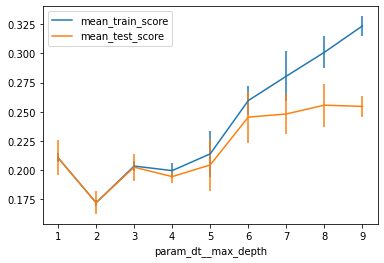

In [65]:
# Plot Train/Validation score for DT with tuning max_dept
# This is train/validated set score in the cross-validation, not real test score
scores = pd.DataFrame(dt_dft.cv_results_)
scores.plot(x='param_dt__max_depth', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_dt__max_depth', y='mean_test_score', yerr='std_test_score', ax=plt.gca())

print(dt_dft.score(X_test, y_test_tran))

Model : DecisionTreeClassifier with tuning max_leaf_nodes = 2 - 10

In [66]:
# DT with tuning max_leaf_nodes
dt = DecisionTreeClassifier(random_state=0)
pipe_dt = Pipeline([('prepro',preproc_X), ('dt',dt)]) 
param_grid = {'dt__max_leaf_nodes':range(2, 10)}
dt_dft2 = GridSearchCV(pipe_dt, param_grid=param_grid, cv=5, return_train_score=True, scoring='recall')
dt_dft2.fit(X_train, y_train_tran)

predict_dt_dft2 = dt_dft2.predict(X_test)

print("Best Param :", dt_dft2.best_params_)
print("Train Accuracy :", dt_dft2.best_score_)
print("Test Accuracy :", accuracy_score(y_test_tran, predict_dt_dft2), '\n')
print("Classification Report :\n", classification_report(y_test_tran, predict_dt_dft2), '\n')

Best Param : {'dt__max_leaf_nodes': 6}
Train Accuracy : 0.21982528758983216
Test Accuracy : 0.8958485069191552 

Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7310
           1       0.61      0.21      0.31       928

    accuracy                           0.90      8238
   macro avg       0.76      0.60      0.63      8238
weighted avg       0.87      0.90      0.87      8238
 



0.20797413793103448


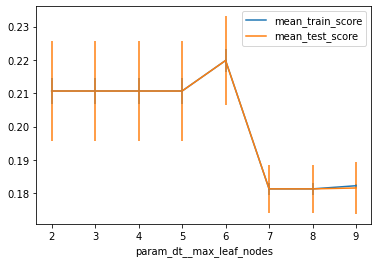

In [67]:
# Plot Train/Validation score for DT with tuning max_dept
# This is train/validated set score in the cross-validation, not real test score
scores = pd.DataFrame(dt_dft2.cv_results_)
scores.plot(x='param_dt__max_leaf_nodes', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_dt__max_leaf_nodes', y='mean_test_score', yerr='std_test_score', ax=plt.gca())

print(dt_dft2.score(X_test, y_test_tran))

Model : GaussianNB

In [68]:
# GaussianNB with all features
nb = GaussianNB()
pipe_nb = Pipeline([('prepro',preproc_X), ('nb',nb)]) 
param_grid = {}
nb_dft = GridSearchCV(pipe_nb, param_grid=param_grid, cv=5, scoring='recall')
nb_dft.fit(X_train, y_train_tran)

predict_nb_dft = nb_dft.predict(X_test)

print("Train Accuracy :", nb_dft.best_score_)
print("Test Accuracy :", accuracy_score(y_test_tran, predict_nb_dft), '\n')
print("Classification Report :\n", classification_report(y_test_tran, predict_nb_dft), '\n')

Train Accuracy : 0.49921314115935617
Test Accuracy : 0.8241077931536781 

Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.86      0.90      7310
           1       0.32      0.51      0.40       928

    accuracy                           0.82      8238
   macro avg       0.63      0.69      0.65      8238
weighted avg       0.86      0.82      0.84      8238
 



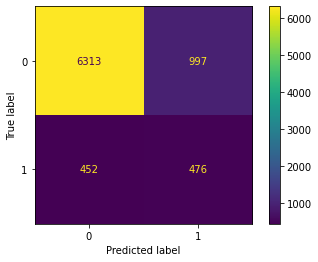

In [69]:
ConfusionMatrixDisplay.from_predictions(y_test_tran, predict_nb_dft)

**Surprise!!!<br>**
We're a bit surprised that simple GaussianNB returns very good for the 'recall' score.<br>
Other simple models never return 'recall' score more than 0.3 for class 1 (yes).

Model : GaussianNB + SMOTE

In [70]:
# GaussianNB with SMOTE + all features
nb = GaussianNB()
pipe_under_nb = make_imb_pipeline(preproc_X, SMOTE(random_state=0, k_neighbors=23), nb)

param_grid = {}
nb_dft = GridSearchCV(pipe_under_nb, param_grid=param_grid, cv=5, scoring=('recall'))
nb_dft.fit(X_train, y_train_tran)

predict_nb_dft = nb_dft.predict(X_test)

print("Train Accuracy :", nb_dft.best_score_)
print("Test Accuracy :", accuracy_score(y_test_tran, predict_nb_dft), '\n')
print("Classification Report :\n", classification_report(y_test_tran, predict_nb_dft), '\n')

Train Accuracy : 0.5935081424834847
Test Accuracy : 0.7614712308812819 

Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.78      0.85      7310
           1       0.26      0.62      0.37       928

    accuracy                           0.76      8238
   macro avg       0.60      0.70      0.61      8238
weighted avg       0.87      0.76      0.80      8238
 



Model : GaussianNB + SMOTE + general best features

In [71]:
# GaussianNB with SMOTE + general best features
nb = GaussianNB()
pipe_under_nb = make_imb_pipeline(preproc_X_interest, SMOTE(random_state=0, k_neighbors=23), nb)

param_grid = {}
nb_dft = GridSearchCV(pipe_under_nb, param_grid=param_grid, cv=5, scoring=('recall'))
nb_dft.fit(X_train[col_interest], y_train_tran)

predict_nb_dft = nb_dft.predict(X_test[col_interest])

print("Train Accuracy :", nb_dft.best_score_)
print("Test Accuracy :", accuracy_score(y_test_tran, predict_nb_dft), '\n')
print("Classification Report :\n", classification_report(y_test_tran, predict_nb_dft), '\n')

Train Accuracy : 0.554713716157633
Test Accuracy : 0.7964311726147123 

Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.82      0.88      7310
           1       0.29      0.57      0.39       928

    accuracy                           0.80      8238
   macro avg       0.62      0.70      0.63      8238
weighted avg       0.87      0.80      0.82      8238
 



Model : BernoulliNB

In [72]:
# BernoulliNB with all features
from sklearn.naive_bayes import BernoulliNB

bn = BernoulliNB()
pipe_bn = Pipeline([('prepro',preproc_X), ('bn',bn)]) 
param_grid = {}
bn_dft = GridSearchCV(pipe_bn, param_grid=param_grid, cv=5, scoring='recall')
bn_dft.fit(X_train, y_train_tran)

predict_bn_dft = bn_dft.predict(X_test)

print("Train Accuracy :", bn_dft.best_score_)
print("Test Accuracy :", accuracy_score(y_test_tran, predict_bn_dft), '\n')
print("Classification Report :\n", classification_report(y_test_tran, predict_bn_dft), '\n')

Train Accuracy : 0.4154099538187504
Test Accuracy : 0.8446224811847536 

Classification Report :
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      7310
           1       0.34      0.41      0.37       928

    accuracy                           0.84      8238
   macro avg       0.63      0.65      0.64      8238
weighted avg       0.86      0.84      0.85      8238
 



Model : BernoulliNB + SMOTE

In [73]:
# BernoulliNB with SMOTE + all features
bn = BernoulliNB()
pipe_under_bn = make_imb_pipeline(preproc_X, SMOTE(random_state=0, k_neighbors=23), bn)

param_grid = {}
bn_dft = GridSearchCV(pipe_under_bn, param_grid=param_grid, cv=5, scoring=('recall'))
bn_dft.fit(X_train, y_train_tran)

predict_bn_dft = bn_dft.predict(X_test)

print("Train Accuracy :", bn_dft.best_score_)
print("Test Accuracy :", accuracy_score(y_test_tran, predict_bn_dft), '\n')
print("Classification Report :\n", classification_report(y_test_tran, predict_bn_dft), '\n')

Train Accuracy : 0.5805476450464896
Test Accuracy : 0.7817431415392085 

Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.81      0.87      7310
           1       0.28      0.59      0.38       928

    accuracy                           0.78      8238
   macro avg       0.61      0.70      0.62      8238
weighted avg       0.87      0.78      0.81      8238
 



Model : BernoulliNB + SMOTE + general best features

In [74]:
# BernoulliNB with SMOTE + general best features
bn = BernoulliNB()
pipe_under_bn = make_imb_pipeline(preproc_X_interest, SMOTE(random_state=0, k_neighbors=23), bn)

param_grid = {}
bn_dft = GridSearchCV(pipe_under_bn, param_grid=param_grid, cv=5, scoring=('recall'))
bn_dft.fit(X_train[col_interest], y_train_tran)

predict_bn_dft = bn_dft.predict(X_test[col_interest])

print("Train Accuracy :", bn_dft.best_score_)
print("Test Accuracy :", accuracy_score(y_test_tran, predict_bn_dft), '\n')
print("Classification Report :\n", classification_report(y_test_tran, predict_bn_dft), '\n')

Train Accuracy : 0.627959790025866
Test Accuracy : 0.7437484826414178 

Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.76      0.84      7310
           1       0.25      0.64      0.36       928

    accuracy                           0.74      8238
   macro avg       0.60      0.70      0.60      8238
weighted avg       0.87      0.74      0.79      8238
 



Model : Bagging (bootstrapped only, no random feature projection) with all features

In [75]:
# Bagging with all features
bg = BaggingClassifier(warm_start=True ,random_state=0)
pipe_bg = Pipeline([('prepro',preproc_X), ('bg',bg)])
param_grid = {}
bg_dft = GridSearchCV(pipe_bg, param_grid=param_grid, cv=5, scoring='recall')
bg_dft.fit(X_train, y_train_tran)

predict_bg_dft = bg_dft.predict(X_test)

print("Train Accuracy :", bg_dft.best_score_)
print("Test Accuracy :", accuracy_score(y_test_tran, predict_bg_dft), '\n')
print("Classification Report :\n", classification_report(y_test_tran, predict_bg_dft), '\n')

Train Accuracy : 0.2677866738254254
Test Accuracy : 0.8841951930080116 

Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.96      0.94      7310
           1       0.47      0.27      0.34       928

    accuracy                           0.88      8238
   macro avg       0.69      0.61      0.64      8238
weighted avg       0.86      0.88      0.87      8238
 



Model : Bagging with SMOTE + general best features

In [76]:
# Bagging with SMOTE + general best features
bg = BaggingClassifier(warm_start=True ,random_state=0)
pipe_bg = make_imb_pipeline(preproc_X_interest, SMOTE(random_state=0), bg)
param_grid = {}
bg_dft = GridSearchCV(pipe_bg, param_grid=param_grid, cv=5, scoring='recall')
bg_dft.fit(X_train[col_interest], y_train_tran)

predict_bg_dft = bg_dft.predict(X_test[col_interest])

print("Train Accuracy :", bg_dft.best_score_)
print("Test Accuracy :", accuracy_score(y_test_tran, predict_bg_dft), '\n')
print("Classification Report :\n", classification_report(y_test_tran, predict_bg_dft), '\n')

Train Accuracy : 0.5018904202022106
Test Accuracy : 0.8355183296916727 

Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.88      0.90      7310
           1       0.34      0.51      0.41       928

    accuracy                           0.84      8238
   macro avg       0.64      0.69      0.66      8238
weighted avg       0.87      0.84      0.85      8238
 



Model : GradientBoost with default parameter + all features

In [77]:
# GradientBoost with all features
gb = GradientBoostingClassifier(random_state=0)
pipe_gb = Pipeline([('prepro',preproc_X), ('gb',gb)]) 
param_grid = {}
gb_dft = GridSearchCV(pipe_gb, param_grid=param_grid, cv=5, scoring='recall')
gb_dft.fit(X_train, y_train_tran)

predict_gb_dft = gb_dft.predict(X_test)

print("Best Param :", gb_dft.best_params_)
print("Train Accuracy :", gb_dft.best_score_)
print("Test Accuracy :", accuracy_score(y_test_tran, predict_gb_dft), '\n')
print("Classification Report :\n", classification_report(y_test_tran, predict_gb_dft), '\n')

Best Param : {}
Train Accuracy : 0.23733861049943225
Test Accuracy : 0.9010682204418549 

Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.67      0.24      0.35       928

    accuracy                           0.90      8238
   macro avg       0.79      0.61      0.65      8238
weighted avg       0.88      0.90      0.88      8238
 



In [78]:
# GradientBoost with tuning param + all features
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

gb = GradientBoostingClassifier(random_state=0)
pipe_gb = Pipeline([('prepro',preproc_X), ('gb',gb)]) 
param_grid = {'gb__max_depth':[3,4,5], 'gb__learning_rate':[0.1,0.5,1]}
gb_dft = GridSearchCV(pipe_gb, param_grid=param_grid, cv=5, scoring='recall')
gb_dft.fit(X_train, y_train_tran)

predict_gb_dft = gb_dft.predict(X_test)

print("Best Param :", gb_dft.best_params_)
print("Train Accuracy :", gb_dft.best_score_)
print("Test Accuracy :", accuracy_score(y_test_tran, predict_gb_dft), '\n')
print("Classification Report :\n", classification_report(y_test_tran, predict_gb_dft), '\n')

Best Param : {'gb__learning_rate': 1, 'gb__max_depth': 5}
Train Accuracy : 0.2901354238843764
Test Accuracy : 0.8868657441126487 

Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7310
           1       0.50      0.23      0.32       928

    accuracy                           0.89      8238
   macro avg       0.70      0.60      0.63      8238
weighted avg       0.86      0.89      0.87      8238
 



Model : GradientBoost with default parameter + SMOTE + general best features

In [79]:
# GradientBoost with SMOTE + general best features
gb = GradientBoostingClassifier(random_state=0)
pipe_gb = make_imb_pipeline(preproc_X_interest, SMOTE(random_state=0), gb)
param_grid = {}
gb_dft = GridSearchCV(pipe_gb, param_grid=param_grid, cv=5, scoring='recall')
gb_dft.fit(X_train[col_interest], y_train_tran)

predict_gb_dft = gb_dft.predict(X_test[col_interest])

print("Train Accuracy :", gb_dft.best_score_)
print("Test Accuracy :", accuracy_score(y_test_tran, predict_gb_dft), '\n')
print("Classification Report :\n", classification_report(y_test_tran, predict_gb_dft), '\n')

Train Accuracy : 0.6166412119585131
Test Accuracy : 0.829084729303229 

Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.86      0.90      7310
           1       0.35      0.62      0.45       928

    accuracy                           0.83      8238
   macro avg       0.65      0.74      0.67      8238
weighted avg       0.88      0.83      0.85      8238
 

